# Analysis and Modelling of King County, WA Home Sale Prices

An analysis and model by Luluva Lakdawala, Amanda Potter and Leana Critchell

## Setting the Scene:

This project investigates the factors that determine housing prices in King County, Washington.  Our model and investigation is directed towards first time home buyers who are looking to live in a single family home.  Many factors contribute to real estate sales prices, and we aim to discover what some of these driving factors are. 

### Aims:

This project aims to:
- Investigate some of the features that appear to have a relationship with King County housing sale prices
- Develop a model that predicts housing prices in King County using the features that we identify
- Validate the following claims made by real estate professions:
    - Higher square footage increases home sale price
    - The presence of a nuisance (power lines, traffic noise, airport noise) decreases home sale price
    - Having a porch increases home sale price

### Definitions:

- Single family home:
    - A single family home is defined in this project as a single residence on one lot.  Condos are not included in our analysis/model but townhomes are.
- First-time home buyers:
    - Home buyers who are making their first ever home purchase.  We have made the assumption in our analysis that first-time home buyers will not typically buy homes greater than $2.5million 
- Model:
    - The term model referred to through this project is in reference to the linear regression model which we build to explain the variance in home sale prices
- Features:
    - Features refer to the independent variables we choose for our model to help predict sale prices
- Target:
    - Sale Price is our target variable which our model aims to predict

### Data:

The data used in this project is from the King County Department of Assessments website and can be found [here](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).  From this link, you can find the files/tables that were used in this project:
- Real Property Sales
- Parcel
- Residential Building
- Lookup

Our analysis was only looking at the most recent data from 2019 so the data was filtered to this accordingly. 

Additional information about the table identifiers can be found [here](https://www5.kingcounty.gov/sdc/Metadata.aspx?Layer=parcel#AttributeInfo).

Note that this modelling analysis contains the 'stream lined' version iterations from getting from our first simple model to our final model.  To get a more in depth view of our exploration process, mistakes and tears - I mean - dead ends, please refer to [Leana's](exploratory/lmc_notebooks), [Luluva's](exploratory/ll_notebooks) and [Amanda's](exploratory/asp_notebooks) notebooks.

### Analysis Takeaways, Future Investigations and Recommendations:

- Our analysis finds square footage of total living area, porch and deck, bathroom count, building grade and township to be some of the more significant driving factors of home sale prices.
- We find that a higher square footage does increase home sale prices in King County
- We find that the presence of nuisances has little affect on home sale prices in King County
- We find that having a porch does increase the home sale price in King County
- Is there a large difference in pricing when looking at condominiums?
- What are the drivers of price in the upper bounds of the market?
- Think about buying smaller and adding extension later
- Consider homes without decks/porches and add later to increase value
- Bathrooms are expensive - look for homes that already have the number of baths you desire even at the expense of square footage



# Data Cleaning and Exploratory Data Analysis:

In [2]:
%load_ext autoreload
%autoreload 2

## Imports

In [3]:
# imports needed throughout analysis and modelling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.modeling import modeling_functions as mf
from src.data_cleaning import cleaning_functions as cf

## Get data:

Firstly, to get the data downloaded, run the cells in [this notebook](exploratory/get_data_script.ipynb).  This will create a `data` folder in the root directory containing all the csv files needed for this project as well as a `raw` folder within `data` containing the corresponding zip files.  

Next, create pandas dataframes of the tables we wish to join:

In [4]:
# real property sales df create:
rps = pd.read_csv("data/EXTR_RPSale.csv")

# residential building df create:
res_build = pd.read_csv("data/EXTR_ResBldg.csv")

# parcel df create:
parcel = pd.read_csv("data/EXTR_Parcel.csv", encoding='latin-1')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# lookup codes df create:
codes = pd.read_csv("data/EXTR_LookUp.csv")

**Note**:  All members of the group explored and cleaned the data to each get a deeper understanding of the tables.  The following shows 'stream-lined' example of the cleaning process to get an idea of how we initially tackled the data in the individual tables and the queries we made.  When it came to start building models from the dataframe, we voted on the cleaned dataframe that would be used and exported it as a csv named `merged_filtered_df` which can be found [here](exploratory/merged_filtered_df).  Execute the cells as show here to get an idea of our data exploration, and then we read in the `merged_filtered_df` to perform our modeling.

You can find more in depth data explorations [here](exploratory/lmc_notebooks/investigate_RPS_LC.ipynb), [here](exploratory/lmc_notebooks/investigate_Parcel_LC.ipynb), [here](exploratory/ll_notebooks/02_ll_data_cleaning.ipynb) and [here](exploratory/asp_notebooks/more_asp_exploring.ipynb).

## Inspect the data:

In [6]:
rps.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,


In [7]:
res_build.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,46100,935,1,1,7349 10TH AVE NW 98117,7349,,,10TH,AVE,...,0,0,0,1927,0,0,0,0,3,0
1,46100,1165,1,1,7342 11TH AVE NW 98117,7342,,,11TH,AVE,...,0,0,0,2019,0,53,0,0,3,0
2,46100,1720,1,1,7330 13TH AVE NW 98117,7330,,,13TH,AVE,...,0,0,0,2019,0,0,0,0,3,0
3,46100,1745,1,1,7348 13TH AVE NW 98117,7348,,,13TH,AVE,...,0,0,0,1910,2005,0,0,0,3,0
4,46100,1930,1,1,7306 14TH AVE NW 98117,7306,,,14TH,AVE,...,1,0,1,1955,0,0,0,0,3,0


In [8]:
parcel.head()

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,916110,346,,WARDALL PARK ADD,20-21-22,3,3,24,14,SW,...,N,N,N,N,N,N,N,N,N,N
1,132606,9228,,NaN,,,6,26,13,SE,...,N,N,N,N,N,N,N,N,N,N
2,329870,12,,HIGHLAND PARK,2,1,4,24,31,SW,...,N,N,N,N,N,N,N,N,N,N
3,884530,50,,UPPERS H S LIBERTY HEIGHTS ADD,9,1,3,24,26,SW,...,N,N,N,N,N,N,N,N,N,N
4,261730,220,,FOUR LAKES,2,3,6,23,27,NE,...,N,N,N,N,N,N,N,N,N,N


We can see that all of these tables have `Major` and `Minor` columns.  We know from the reference link [here](https://www5.kingcounty.gov/sdc/Metadata.aspx?Layer=parcel#AttributeInfo) that we need to combine the major and minor columns and join the tables on this combined identifier.  Also note that this identifier needs to be a 10 digit number so we will pad with 0's before each major/minor number to get the number we need.

First though, we will make our tables more pythonic by making all columns lower case:

In [9]:
# list of tables to manipulate
tables = [rps, res_build, parcel]
for table in tables:
        colnames = list(map(lambda x: x.lower(), table.columns))
        table.columns = colnames

Now we create the `maj_min` column to join the tables on and drop the exising `major`, `minor` columns:

In [10]:
# custom function does all of this
for table in tables:
    cf.maj_min_col(table)

Preview new tables:

In [11]:
rps.head()

,excisetaxnbr,major_minor,documentdate,saleprice,recordingnbr,volume,page,platnbr,plattype,platlot,...,propertytype,principaluse,saleinstrument,afforestland,afcurrentuseland,afnonprofituse,afhistoricproperty,salereason,propertyclass,salewarning
0,2687551,1388600110,08/21/2014,245000,20140828001436,,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,6648850040,07/09/1991,0,199203161090,071,001,664885,C,B102,...,3,0,26,N,N,N,N,18,3,11
2,2704079,4239430050,10/11/2014,0,20141205000558,,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,4037000715,01/04/2013,0,20130110000910,,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,3027422,2130430120,12/20/2019,560000,20191226000848,,,,,,...,11,6,3,N,N,N,N,1,8,


In [12]:
res_build.head()

,bldgnbr,major_minor,nbrlivingunits,address,buildingnumber,fraction,directionprefix,streetname,streettype,directionsuffix,...,fpmultistory,fpfreestanding,fpadditional,yrbuilt,yrrenovated,pcntcomplete,obsolescence,pcntnetcondition,condition,addnlcost
0,1,0461000935,1,7349 10TH AVE NW 98117,7349,,,10TH,AVE,NW,...,0,0,0,1927,0,0,0,0,3,0
1,1,0461001165,1,7342 11TH AVE NW 98117,7342,,,11TH,AVE,NW,...,0,0,0,2019,0,53,0,0,3,0
2,1,0461001720,1,7330 13TH AVE NW 98117,7330,,,13TH,AVE,NW,...,0,0,0,2019,0,0,0,0,3,0
3,1,0461001745,1,7348 13TH AVE NW 98117,7348,,,13TH,AVE,NW,...,0,0,0,1910,2005,0,0,0,3,0
4,1,0461001930,1,7306 14TH AVE NW 98117,7306,,,14TH,AVE,NW,...,1,0,1,1955,0,0,0,0,3,0


In [13]:
parcel.head()

,propname,major_minor,platname,platlot,platblock,range,township,section,quartersection,proptype,...,seismichazard,landslidehazard,steepslopehazard,stream,wetland,speciesofconcern,sensitiveareatract,waterproblems,transpconcurrency,otherproblems
0,,9161100346,WARDALL PARK ADD,20-21-22,3,3,24,14,SW,R,...,N,N,N,N,N,N,N,N,N,N
1,,1326069228,NaN,,,6,26,13,SE,R,...,N,N,N,N,N,N,N,N,N,N
2,,3298700012,HIGHLAND PARK,2,1,4,24,31,SW,R,...,N,N,N,N,N,N,N,N,N,N
3,,8845300050,UPPERS H S LIBERTY HEIGHTS ADD,9,1,3,24,26,SW,R,...,N,N,N,N,N,N,N,N,N,N
4,,2617300220,FOUR LAKES,2,3,6,23,27,NE,R,...,N,N,N,N,N,N,N,N,N,N


### Inspect info of these tables:

#### RPS table:

In [14]:
rps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089099 entries, 0 to 2089098
Data columns (total 23 columns):
excisetaxnbr          int64
major_minor           object
documentdate          object
saleprice             int64
recordingnbr          object
volume                object
page                  object
platnbr               object
plattype              object
platlot               object
platblock             object
sellername            object
buyername             object
propertytype          int64
principaluse          int64
saleinstrument        int64
afforestland          object
afcurrentuseland      object
afnonprofituse        object
afhistoricproperty    object
salereason            int64
propertyclass         int64
salewarning           object
dtypes: int64(7), object(16)
memory usage: 366.6+ MB


Currently, this table has over 2million entries.  This would be due to the fact that we have not yet filtered down to our desired date range of 2019.  Notice also that `documentdate` is an object type and not a datetime object.  We update this now so that we can filter entries by date:

In [15]:
# change document date type
rps['documentdate'] = pd.to_datetime(rps['documentdate'])

In [16]:
# create new df isolating 2019 data
rps19 = rps[rps['documentdate'].dt.year == 2019]

We also note that columns `volume`, `page`, `platnbr`, `platlot` are not showing up as null in the `rps.info()` table but we can see in the head of the dataframe that there are blank values.  These must be empty strings or strings of white space.  These will probably end up being dropped.  

#### res_build table:

In [17]:
res_build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515263 entries, 0 to 515262
Data columns (total 49 columns):
bldgnbr               515263 non-null int64
major_minor           515263 non-null object
nbrlivingunits        515263 non-null int64
address               515263 non-null object
buildingnumber        515263 non-null object
fraction              515263 non-null object
directionprefix       514721 non-null object
streetname            515263 non-null object
streettype            515263 non-null object
directionsuffix       514721 non-null object
zipcode               469778 non-null object
stories               515263 non-null float64
bldggrade             515263 non-null int64
bldggradevar          515263 non-null int64
sqft1stfloor          515263 non-null int64
sqfthalffloor         515263 non-null int64
sqft2ndfloor          515263 non-null int64
sqftupperfloor        515263 non-null int64
sqftunfinfull         515263 non-null int64
sqftunfinhalf         515263 non-null int6

Nothing stands out here just yet.  Note there are some null zipcodes but that might be filtered out when we merge the tables.  For now everything looks good.

#### parcel table:

In [18]:
parcel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614843 entries, 0 to 614842
Data columns (total 80 columns):
propname                  601757 non-null object
major_minor               614843 non-null object
platname                  520495 non-null object
platlot                   614843 non-null object
platblock                 614843 non-null object
range                     614843 non-null int64
township                  614843 non-null int64
section                   614843 non-null int64
quartersection            614843 non-null object
proptype                  614843 non-null object
area                      614813 non-null float64
subarea                   614813 non-null float64
specarea                  17332 non-null float64
specsubarea               17332 non-null float64
districtname              614843 non-null object
levycode                  614843 non-null int64
currentzoning             614842 non-null object
hbuasifvacant             614843 non-null int64
hbuasimpro

Nothing significant stands out that needs cleaning right now so we move on to joining the dataframes:

### Merge dataframes:

In [19]:
# merge rps19 and res_build:
resb_rps = res_build.merge(rps19, on='major_minor', suffixes=("", "_rp"))

In [20]:
# merge resb_rps and parcel:
df = resb_rps.merge(parcel, on='major_minor', suffixes=("", "_parcel"))

### Inspect merged dataframe:

In [21]:
df.head()

,bldgnbr,major_minor,nbrlivingunits,address,buildingnumber,fraction,directionprefix,streetname,streettype,directionsuffix,...,seismichazard,landslidehazard,steepslopehazard,stream,wetland,speciesofconcern,sensitiveareatract,waterproblems,transpconcurrency,otherproblems
0,1,0461001720,1,7330 13TH AVE NW 98117,7330,,,13TH,AVE,NW,...,N,N,N,N,N,N,N,N,N,N
1,1,0461004710,1,7041 9TH AVE NW,7041,,,9TH,AVE,NW,...,N,N,N,N,N,N,N,N,N,N
2,1,0098300030,1,1827 298TH CRESENT SE 98024,1827,,,298TH CRESENT,,SE,...,N,N,N,N,N,N,N,N,N,N
3,1,0100600800,1,33411 28TH PL SW 98023,33411,,,28TH,PL,SW,...,N,N,N,N,N,N,N,N,N,N
4,1,0100600800,1,33411 28TH PL SW 98023,33411,,,28TH,PL,SW,...,N,N,N,N,N,N,N,N,N,N


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43867 entries, 0 to 43866
Columns: 150 entries, bldgnbr to otherproblems
dtypes: bool(1), datetime64[ns](1), float64(5), int64(83), object(60)
memory usage: 50.2+ MB


In [24]:
df.shape

(43867, 150)

### Investigate columns:

Property type seems relevant to us so we look up the relevant look up code as per the look up codes in [this](https://info.kingcounty.gov/assessor/datadownload/desc/Lookup.doc) document.

In [25]:
codes[codes['LUType'] == 1]

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...
1,1,10,Land with new building ...
2,1,11,"Household, single family units ..."
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."
...,...,...,...
79,1,93,Water areas ...
80,1,94,Open space land classified under chapter 84.34...
81,1,95,Timberland classified under chapter 84.34 RCW ...
82,1,96,Improvements on leased land ...


For our purposes, we will only need property types 11, 14 and 18.  

In [26]:
property_types = [11, 14, 18]
# subset dataframe with relevant prop types
df = df[df['propertytype'].isin(property_types)]

In [27]:
df.shape

(26521, 150)

So, we now have 26521 entries left with our relevant property types.

Next, we investigate the principal use types:

In [28]:
codes[codes['LUType'] == 2]

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL ...
805,2,10,OTHER ...
806,2,11,COMMERCIAL/INDUSTRIAL ...
807,2,2,CONDOMINIUM ...
808,2,3,RECREATIONAL ...
809,2,4,APT(4+ UNITS) ...
810,2,5,INDUSTRIAL ...
811,2,6,RESIDENTIAL ...
812,2,7,COMMERCIAL ...
813,2,8,MOBILE HOME ...


We decide the only items relevant to us are 2 and 6.  While we mentioned earlier we are only looking at single family homes and not conominiums, we'd like to have this column available in case we would like to do further analysis on this.  

In [29]:
princ_use = [2, 6]
# subset df with relvant principal uses
df = df[df['principaluse'].isin(princ_use)]

In [30]:
df.shape

(26518, 150)

We lost 3 entries with this subset. 

Looking into the different types of sales instruments will also shed light on whether an entry in our dataframe was actually a house being sold or if it was a quit claim deed or other title clouding transaction.

In [31]:
codes[codes['LUType'] == 6]

,LUType,LUItem,LUDescription
1002,6,1,None ...
1003,6,10,Real Estate Contract ...
1004,6,11,Purchaser's Assignment ...
1005,6,13,Seller's Assignment ...
1006,6,15,Quit Claim Deed ...
1007,6,18,Trustees' Deed ...
1008,6,19,Executor's Deed ...
1009,6,2,Warranty Deed ...
1010,6,20,Fiduciary Deed ...
1011,6,21,Sheriff's Deed ...


The only sales instruments we are interested in here are Warranty Deed and Statutory Warranty Deed.  We will filter our data based on these codes. 

In [32]:
deeds = [2, 3]
# subset df with relvant sales instruments
df = df[df['saleinstrument'].isin(deeds)]

In [33]:
df.shape

(20292, 150)

6,226 entries lost this time. 

Because we are dealing with first time home buyers and have assumed that our first time home buyers will not be buying extravagant houses, we have decided to limit the total living square footage to houses less than 4500 square feet.  For the same reason, we've also decided to only included houses that sold for less that $2.5$million dollars (and more than $10$ dollars to eliminate any $0 data).  

In [34]:
# subset df with sf less than 4500
df = df[df['sqfttotliving'] < 4500]

In [35]:
df.shape

(19795, 150)

497 lost

In [36]:
# subset df between $10 and $2.5mil
df = df[(df['saleprice'] < 2500000) & (df['saleprice'] > 10)]

In [37]:
df.shape

(18064, 150)

For more details on the investigation, cleaning and merging of these tables, view the notebooks [here](exploratory/ll_notebooks/01_ll_data_collection.ipynb) and [here](exploratory/ll_notebooks/02_ll_data_collection.ipynb)

Now, the columns relevant to us for our first time home buyers buying single family homes are the following:

In [38]:
columns = ['documentdate', 'saleprice', 'propertytype', 'principaluse', 'saleinstrument', 'afcurrentuseland', 'afhistoricproperty', 'salereason', 'propertyclass', 
           'zipcode','streettype','stories','bldggrade','sqfttotliving','sqfttotbasement','sqftgarageattached','sqftopenporch',
           'sqftenclosedporch','sqftdeck','bedrooms','bathhalfcount','bath3qtrcount','bathfullcount','fpsinglestory' ,'fpmultistory',
           'fpfreestanding','fpadditional','yrbuilt','yrrenovated','pcntcomplete' ,'obsolescence','condition','township','propertytype','districtname',
           'levycode','lotsquarefootage','watersystem','viewMtRanier','viewOlympics','viewCascades','viewterritorial','viewseattleskyline','viewpugetsound','viewlakewashington',
           'viewlakesammamish','viewsmalllakerivercreek','viewotherview','waterfrontlocation','waterfrontfootage','waterfrontbank','waterfrontpoorqualtiy','waterfrontrestrictedaccess',
           'waterfrontaccessrights','waterfrontproximityinfluence','tidelandshoreland','lotdepthfactopr','traficnoise','airportnoise','powerlines','othernuisances']

In [39]:
df = df.loc[:, columns]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [40]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,afcurrentuseland,afhistoricproperty,salereason,propertyclass,zipcode,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,traficnoise,airportnoise,powerlines,othernuisances
1,2019-12-20,1615000,11,6,3,N,N,1,8,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,N,N
4,2019-05-24,385000,11,6,3,N,N,1,8,98023,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,N,N
5,2019-01-14,409950,11,6,3,N,N,1,8,98023,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,N,N
7,2019-06-18,1950000,11,6,3,N,N,1,8,98117,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,N,N
9,2019-05-29,360000,11,6,3,N,N,1,8,98023,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,N,N


## Results of cleaning and investigation:

After looking through the data, we eliminated any columns that are irrelevant to the interest of first time home buyers of single family homes.  As mentioned earlier, after much data cleaning and exploring, we came to consensus on using the dataframe which we exported as `merged_filtered_df`.  We load this dataframe now to continue our modeling process:

In [134]:
df = pd.read_csv('exploratory/merged_filtered_df')
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [135]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,0,0,0,N,N,0.0,0,0,0,N
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,0,0,0,N,N,0.0,0,1,0,N
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,0,0,0,N,N,0.0,0,1,0,N
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,0,0,0,N,N,0.0,0,1,0,N
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,0,0,0,N,N,0.0,0,0,0,N


In [43]:
df['documentdate'] = pd.to_datetime(df['documentdate'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 64 columns):
documentdate                    18182 non-null datetime64[ns]
saleprice                       18182 non-null float64
propertytype                    18182 non-null int64
principaluse                    18182 non-null int64
saleinstrument                  18182 non-null int64
currentuseland                  18182 non-null object
historicproperty                18182 non-null object
salereason                      18182 non-null int64
propertyclass                   18182 non-null int64
zipcode                         15815 non-null float64
streettype                      18182 non-null object
stories                         18182 non-null float64
buildinggrade                   18182 non-null int64
squarefeettotalliving           18182 non-null int64
squarefeettotalbasement         18182 non-null int64
squarefeetgarageattached        18182 non-null float64
squarefeetopenporch    

## Investigate Target Variable:  Sales Price

First, let's view the summary statistics and distribution of our target variable:

In [45]:
df.saleprice.describe()

count    1.818200e+04
mean     7.334650e+05
std      3.686947e+05
min      5.000000e+03
25%      4.690000e+05
50%      6.500000e+05
75%      8.800000e+05
max      2.498000e+06
Name: saleprice, dtype: float64

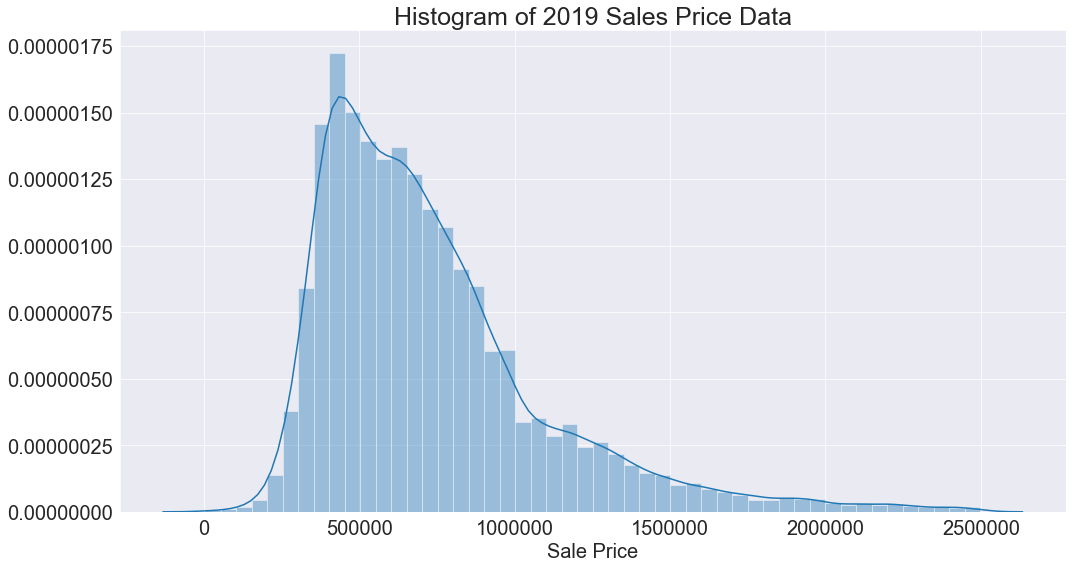

In [46]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Histogram of 2019 Sales Price Data', fontsize = 25)
sns.distplot(df.saleprice, ax = ax, axlabel = "")
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Sale Price', fontsize = 20)
plt.tight_layout()

Here we see our filtered sales price data is right skewed.  This makes sense since we have included houses up to 2.5million dollars.  We see that our mean house price is $733,465 in King County.

Now, to get an idea of which features might best describe the variance in sale price, let's get a feel for which features in our dataframe are correlated with sale price:

In [47]:
# create correlation matrix
df_corr = df.corr()

# inspect all the correlations with 'saleprice' in descedning order so we can see highest correlations
sorted_corrs = df_corr['saleprice'].sort_values(ascending = False)
sorted_corrs

saleprice                     1.000000
buildinggrade                 0.616371
squarefeettotalliving         0.596841
township                      0.460482
bathfullcount                 0.314990
stories                       0.291290
bedrooms                      0.285509
viewseattleskyline            0.241013
squarefeettotalbasement       0.225156
squarefeetopenporch           0.206762
squarefeetdeck                0.202800
viewlakesammamish             0.186913
fireplacemultiplestory        0.182270
bath3qtrcount                 0.178428
bathhalfcount                 0.175342
viewcascades                  0.160079
viewpugetsound                0.139496
topography                    0.135018
viewlakewashington            0.133095
squarefeetgarageattached      0.117777
viewterritorial               0.116188
fireplacesinglestory          0.114337
viewsmalllakerivercreek       0.108344
yearrenovated                 0.101951
fireplaceadditional           0.094298
lotdepthfactopr          

From here we see that the top 2 highest correlated features with `saleprice` are `buildinggrade` and `squarefeettotalliving`.  Intuition tells us that houses with larger square footage are more expensive than smaller square foot houses.  We will start with this feature to investigate further and potentially build our first simple model.  

### Total Living Square Footage

We start this investigating by looking at the relationship between total living square footage and sale price. 

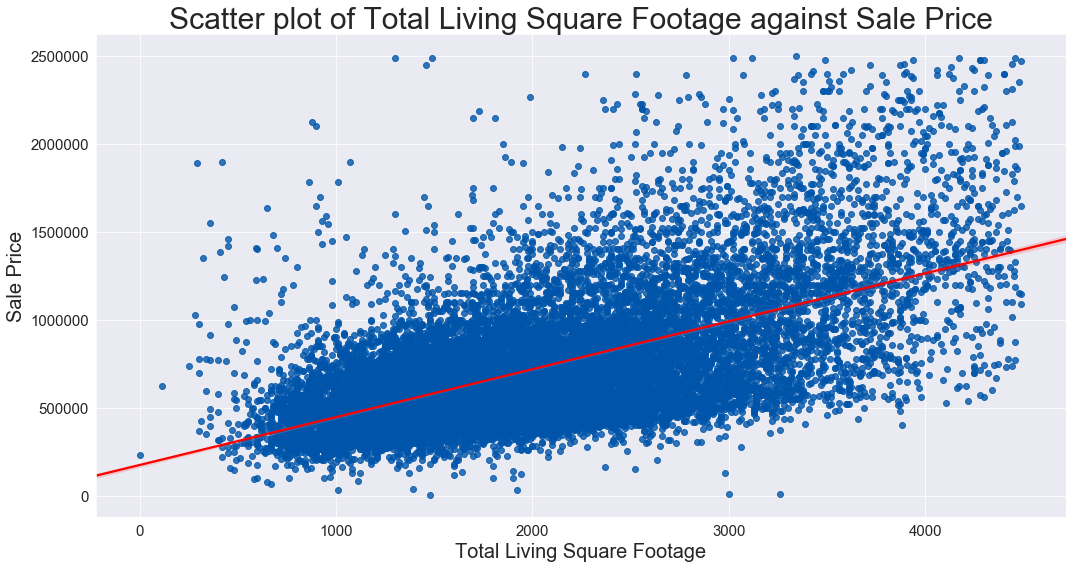

In [48]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'squarefeettotalliving', y = 'saleprice', data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Total Living Square Footage against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Total Living Square Footage', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

We can see here that there is a fairly strong linear relationship with sales price.  

Let's check out the distribution of total living square footage:

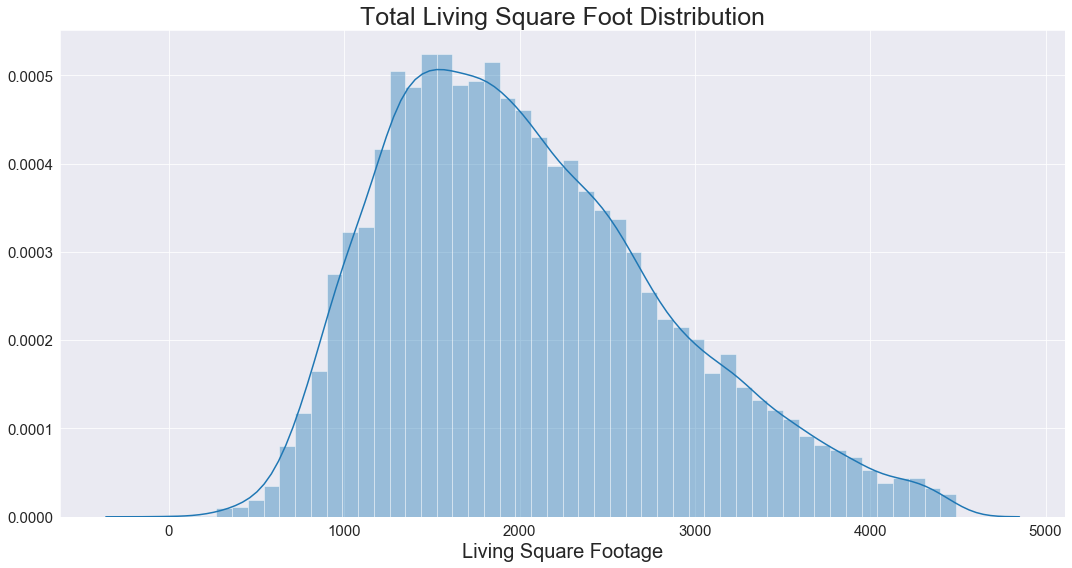

In [49]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Total Living Square Foot Distribution', fontsize = 25)
sns.distplot(df.squarefeettotalliving, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Living Square Footage', fontsize = 20)
plt.tight_layout()

This looks quite normal with a bit of right skew.  Let's see how a log transform would help:

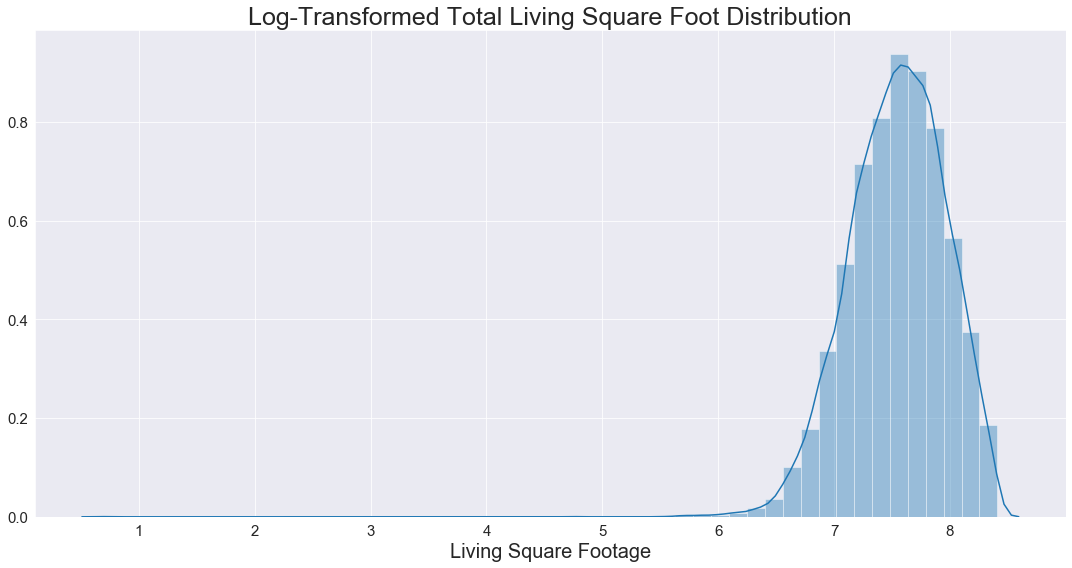

In [50]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Log-Transformed Total Living Square Foot Distribution', fontsize = 25)
sns.distplot(np.log(df.squarefeettotalliving), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Living Square Footage', fontsize = 20)
plt.tight_layout()

This appears to have skewed it to the left now, so move up the ladder of powers slightly and try a square root transformation:

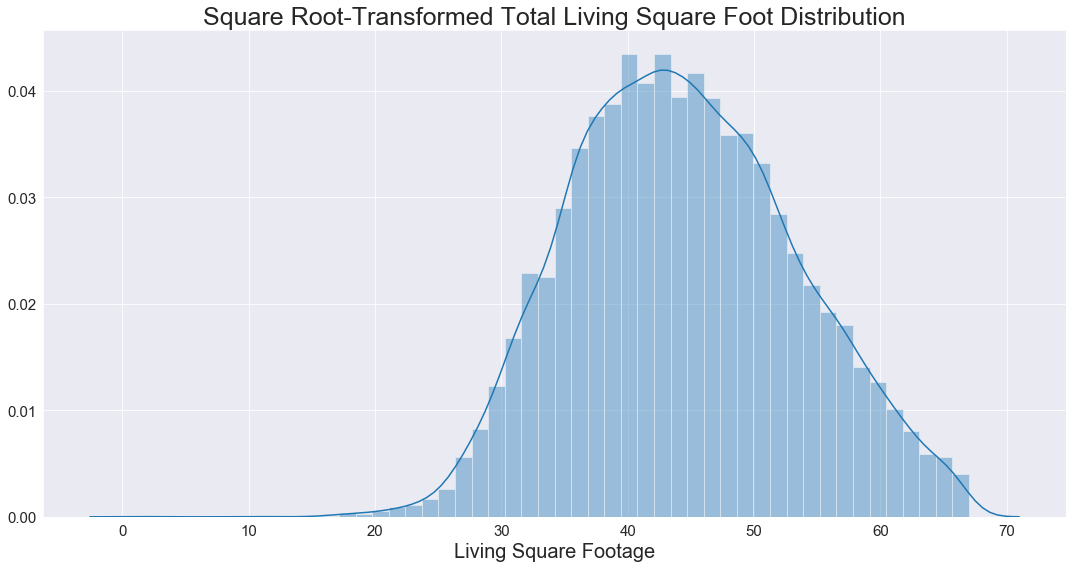

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Square Root-Transformed Total Living Square Foot Distribution', fontsize = 25)
sns.distplot(np.sqrt(df.squarefeettotalliving), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Living Square Footage', fontsize = 20)
plt.tight_layout()

This now looks pretty normal and would be suitable to use for modeling.  

Let's add a column to our df for this transformation so we can use it later.

In [52]:
df['sqrt_totlivingsqft'] = np.sqrt(df.squarefeettotalliving)

# First Simple Model:  `saleprice ~ squarefeettotalliving`

Custom functions have been made to fit models, print their summaries and check the linear regression assumptions.

In [53]:
features_fsm = ['saleprice', 'sqrt_totlivingsqft']

In [54]:
fsm = mf.model(features_fsm, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     9021.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:06:04   Log-Likelihood:            -2.5519e+05
No. Observations:               18182   AIC:                         5.104e+05
Df Residuals:                   18180   BIC:                         5.104e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.278e+05   1.14

Our first simple model has produced an $R^2$ of `0.332`.  The p-value for the `sqrt_totlivingsqft` coefficient is 0 which tells us there is significant evidence to suggest that total living square footage does have an impact on sales price.  We saw earlier that total living square footage is linear with sales price, but let's check the other two assumptions of linear regression:

### Normality:

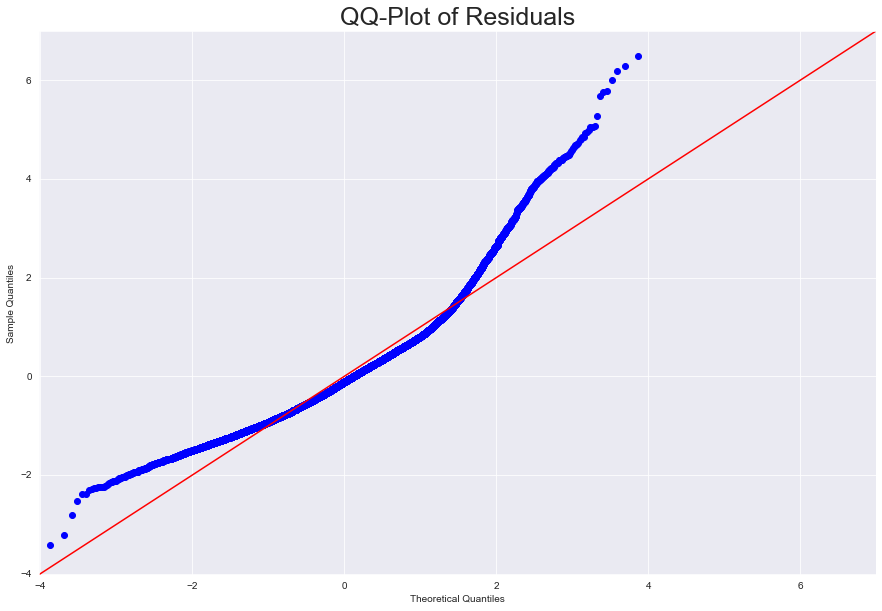

In [55]:
mf.normality_assumption(fsm)

For a first shitty model, it's not bad.  We can see the residuces hugging the line in the middle but moving away at the tails.  The sharp incline at the top is probably due to the right skewed data of our sales price.  We might think about reducing the sales price range further but we also don't want to restrict our data too much

### Homoscedasticity

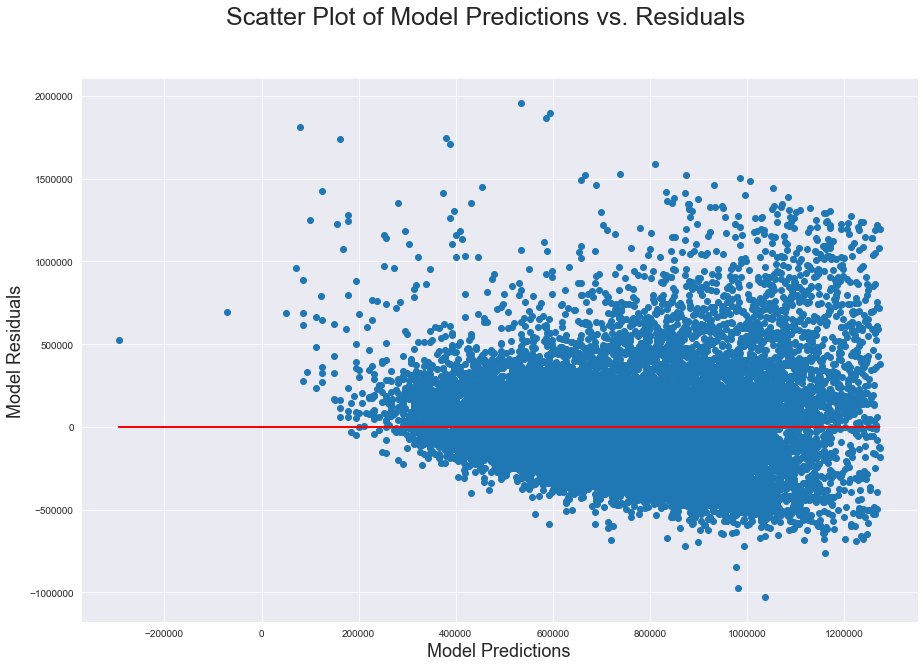

In [56]:
mf.homo_assumption(fsm, df)

Again not terrible for a first model however you can see if it quite cone shaped starting around x = 200000 and fans outwards as x gets larger.  We would say that this model violates the homoscedasticity assumption.

# Model iterations

To start adding more features to our model, we come back to our sorted correlated values and look at the features with correlations with sale price greater than 0.2:

In [57]:
sorted_corrs[sorted_corrs > 0.2]

saleprice                  1.000000
buildinggrade              0.616371
squarefeettotalliving      0.596841
township                   0.460482
bathfullcount              0.314990
stories                    0.291290
bedrooms                   0.285509
viewseattleskyline         0.241013
squarefeettotalbasement    0.225156
squarefeetopenporch        0.206762
squarefeetdeck             0.202800
Name: saleprice, dtype: float64

Looking at this list again we can notice some common themes:  
- the square footage of decks and porches seem relevant
- the square footage of the basement has some relevance
- the make up of the house:  number of bedrooms and number of bathrooms
- the location:  township and view of seattle sky line
- the build of the house:  building grade and the number of stories. 

We first stick to features of the actual hous:  squarefootage, bathrooms and porches.  We choose not to include bedrooms here simply because it seems like bathrooms has a higher correlation and so we run with that first.  It should also be noted that real estate standard practice is that the total living squarefootage **includes** finished and unfinished basement square footage.  For this reason, we won't add in basement square footage to our model in fear of double counting with the value of total living square footage.  

Let's start investigating these features to get a feel of how we will include them in our model.

### Bathroom count

Notice above that **full** bathroom count was highly correlated.  In our dataframe, we have columns for the counts of half bath and three quater baths.  In real estate, bathrooms are defined as:
- A half bath is considered a bathroom with only a toilet and shower
- A 3/4 bath is considered a bathroom with a toilet and shower/tub
- A full bath is considered a bathroom with a toilet, shower and seperate tub.

So to know what the total bathroom count per house is, we actually need to create a column with the **weighted** bathroom counts.  We do this as follows:

In [58]:
df['bathtotcount'] = df['bathfullcount'] + (0.75 * df['bath3qtrcount']) + (0.5 * df['bathhalfcount'])

Let's visualise the linear relationship between total bathroom count and sale price:

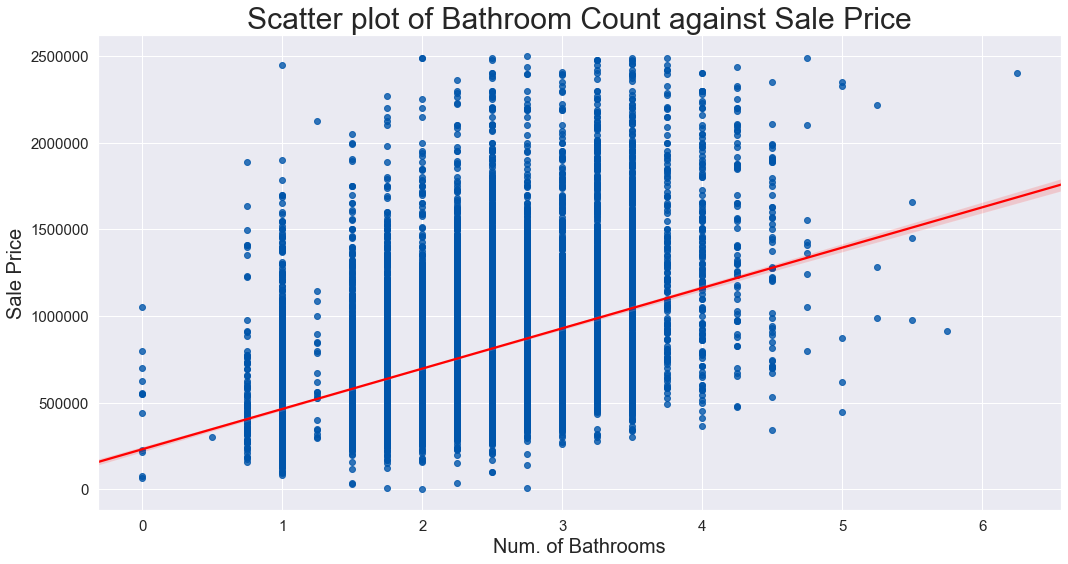

In [59]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'bathtotcount', y = 'saleprice', 
            data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Bathroom Count against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Num. of Bathrooms', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

From here we can see that there does appear to be some what of a linear relationship between bath count and sale price.  

Now, we see here that we have some houses in our dataframe with '0' bathrooms.  We're assuming our first time home buyers want bathrooms in their first house so we're going to remove any houses that don't have bathrooms:

In [60]:
df.shape

(18182, 66)

In [61]:
df = df[df['bathtotcount'] > 0]
df.shape

(18170, 66)

So we removed 12 entries.

Let's view the distribution of this feature:

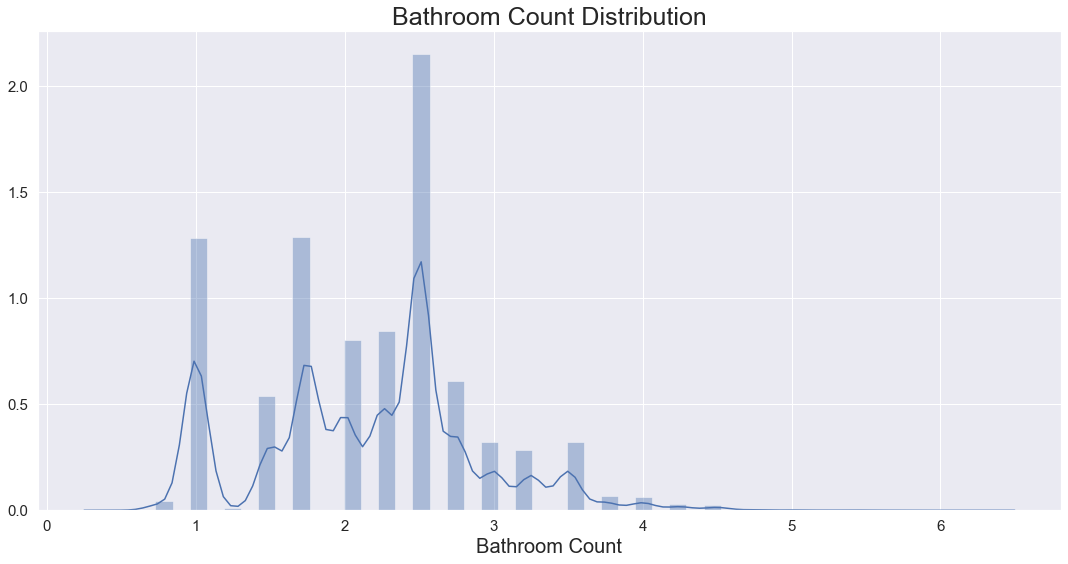

In [62]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Bathroom Count Distribution', fontsize = 25)
sns.distplot(df.bathtotcount, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Bathroom Count', fontsize = 20)
plt.tight_layout()

This data looks somewhat normal but is multimodal and seems more right skewed.  Let's see what a log transformation would do.  This is valid since we removed all entries with 0 bathrooms. 

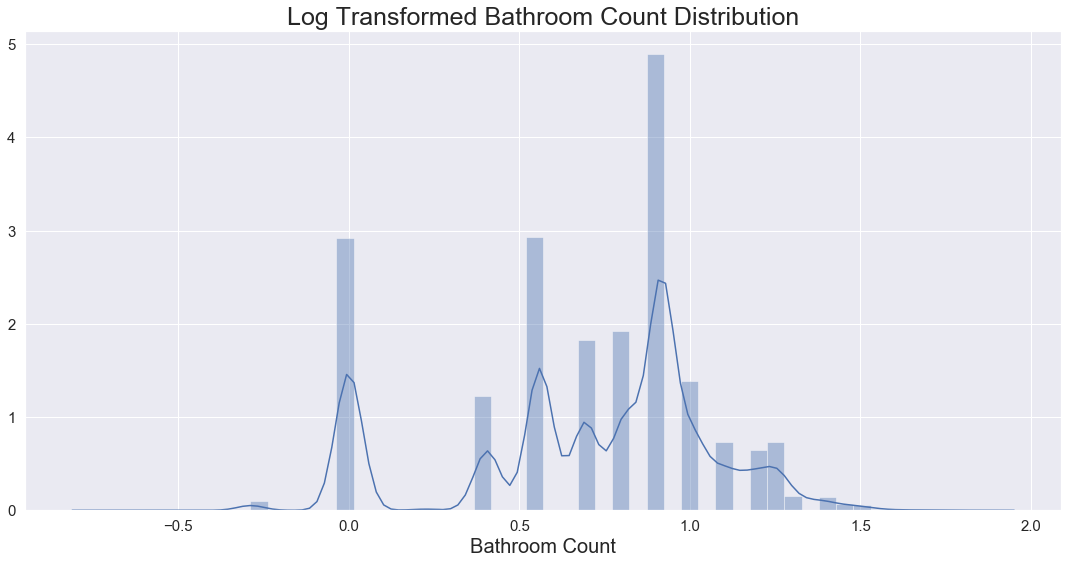

In [63]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Log Transformed Bathroom Count Distribution', fontsize = 25)
sns.distplot(np.log(df.bathtotcount), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Bathroom Count', fontsize = 20)
plt.tight_layout()

This seems to have skewed our data more to the left.  We could try a square root transformation however, due to the multimodal and categorical nature of this feature, the distribution probably won't improve much so we choose to keep bathroom count un-transformed.  

### Porch square footage

Similarily to bathroom count, we have two columns relating to porch squarefootage.  Our first time home buyers don't really care whether the porch is open or enclosed, they just want to know if it does or does not have a porch.  For this reason, we combine these two values into one column:

In [64]:
df['sqftporch'] = df['squarefeetopenporch'] + df['squarefeetenclosedporch']

Let's now inspect the relationship with sale price:

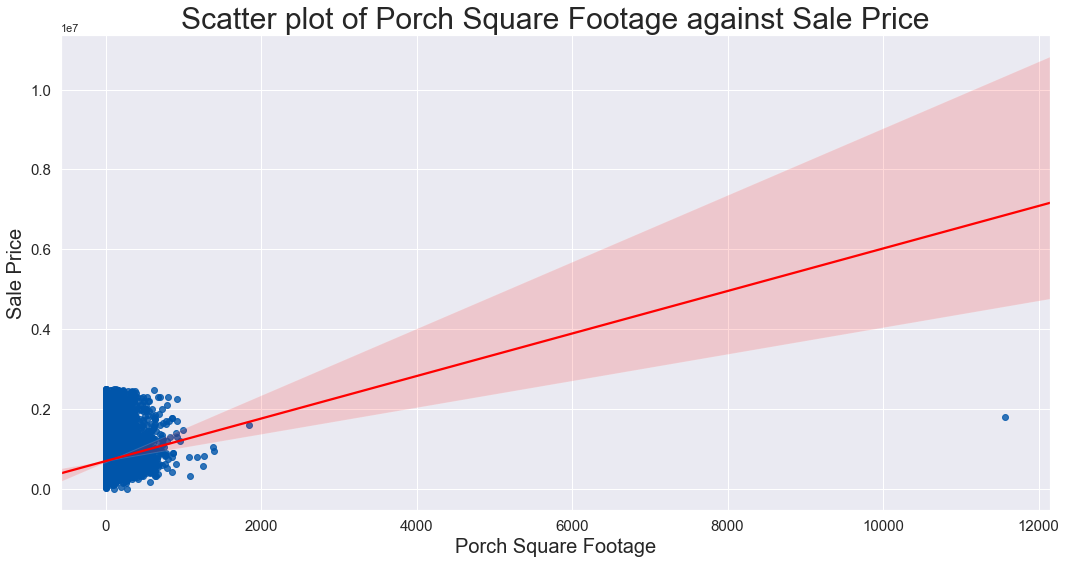

In [65]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'sqftporch', y = 'saleprice', data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Porch Square Footage against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Porch Square Footage', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

From here we can see that there appears to be a significant outlier - a porch greater than 10,000 square feet?

In [66]:
df.sqftporch.max()

11570

In [67]:
# inspect the outlier row:
df[df['sqftporch'] == df.sqftporch.max()]

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances,sqrt_totlivingsqft,bathtotcount,sqftporch
8921,2019-12-23,1800000.0,11,6,3,N,N,1,8,98045.0,...,N,N,0.0,0,0,0,N,61.400326,4.0,11570


This could have been a data entry error where an extra 0 was added.  However, we don't want to jump to conclusions so since it is only 1 outlier and it is a $1.8million house that would be contributing to the right-skew nature of the sale price distribution, we choose to just drop this row from our data:

In [68]:
# create variable of index of row to be removed (in case index changes on future cell runs for whatever reason)
remove_index = 8921
df.drop(remove_index, axis = 0, inplace = True)

Let's check to see how this affected our plot:

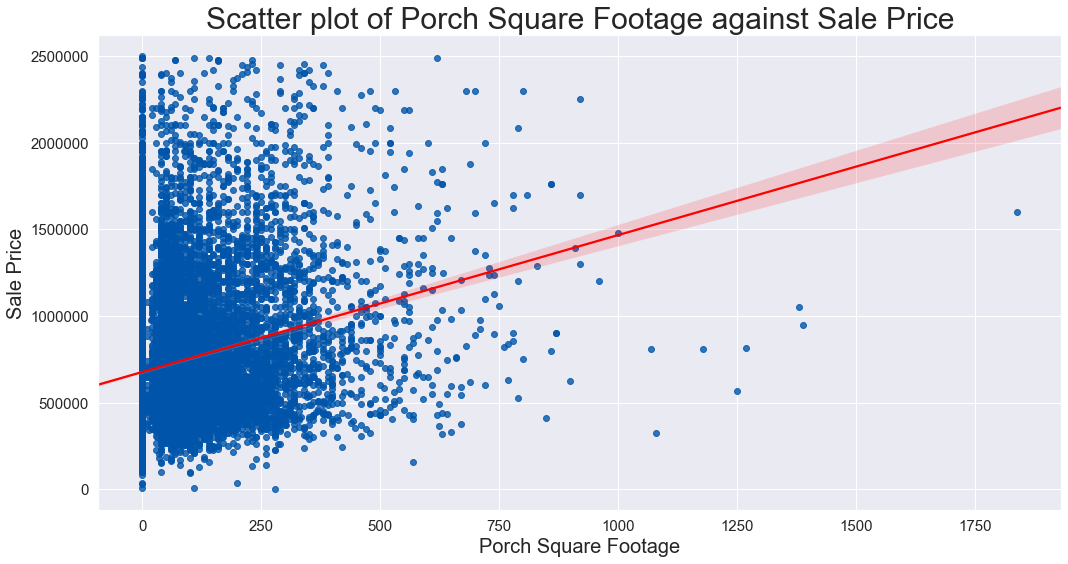

In [69]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'sqftporch', y = 'saleprice', data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Porch Square Footage against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Porch Square Footage', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

This has imporved the fit significantly and there seems to be a mild linear relationship here between porch size and sale price however it's hard to tell since houses with no porches are also included.  This means we have a lot of '0' values that are throwing off the relationship.  

Let's visualise the distribution of the sqft porch data:

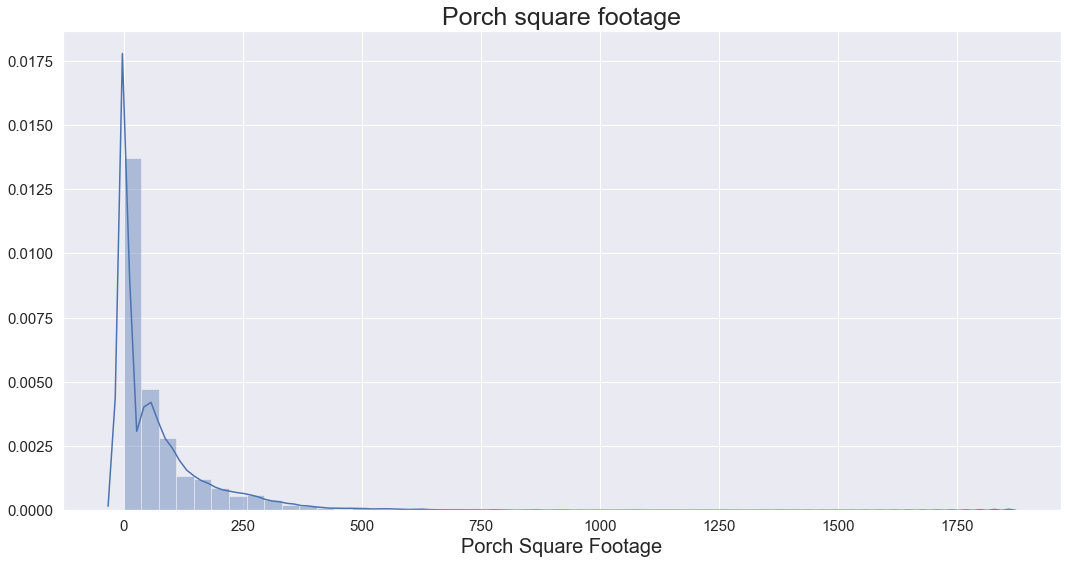

In [70]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Porch square footage', fontsize = 25)
sns.distplot(df.sqftporch, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Porch Square Footage', fontsize = 20)
plt.tight_layout()

This data is very skewed to the right.  We can not do a log transformation in this case since we have 0 values in our data.  Instead, we'll try a square root transformation to see if it helps to normalise the data.

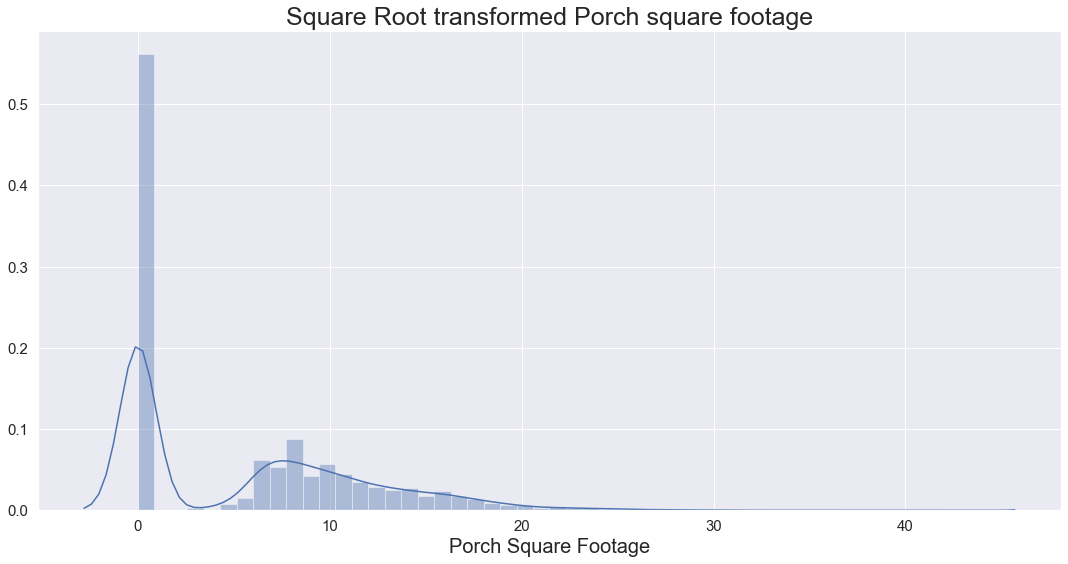

In [71]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Square Root transformed Porch square footage', fontsize = 25)
sns.distplot(np.sqrt(df.sqftporch), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Porch Square Footage', fontsize = 20)
plt.tight_layout()

This has helped the skewness in the build of the data however those 0 values are really throwing things out.  The bulk of the data does still seem quite right skewed so let's keep moving down the ladder of powers and see if a cube root transformation would help:

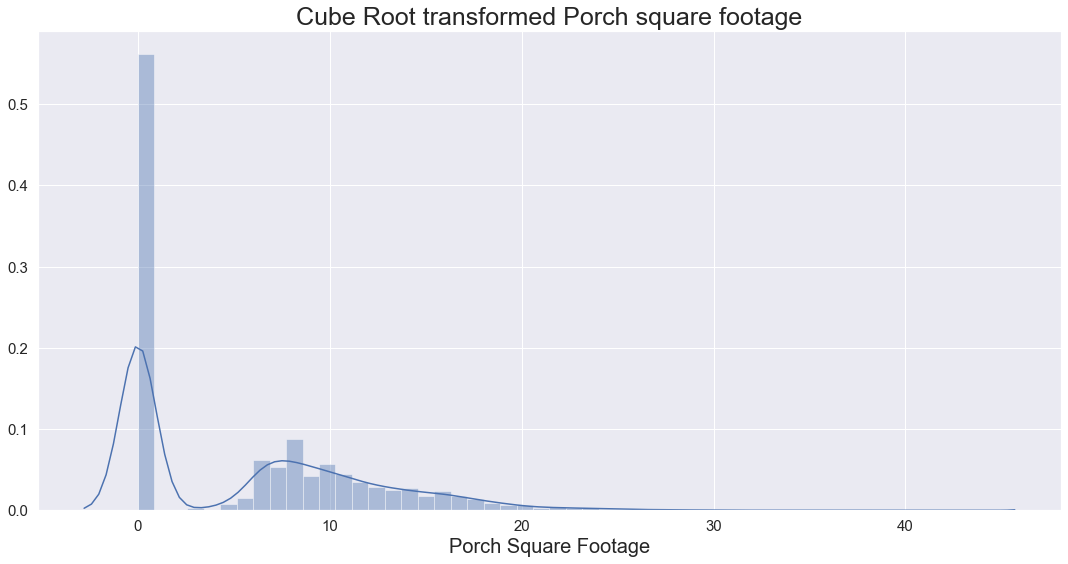

In [72]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Cube Root transformed Porch square footage', fontsize = 25)
sns.distplot(np.sqrt(df.sqftporch), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Porch Square Footage', fontsize = 20)
plt.tight_layout()

It looks very much the same as the square root transformed data.  For this reason, we'll choose to model with the squareroot data.

In [73]:
df['sqrt_porch_size'] = np.sqrt(df.sqftporch)

# Model 2:  `saleprice ~ sqrt_totlivingsqft + bathtotcount + sqrt_porch_size`

Now that we've investigated each feature in more detail and can see they all have a linear relationship with sale price, let's see if they improve our model.  First, let's visualise any multicollinearity there might be between any of our model features:

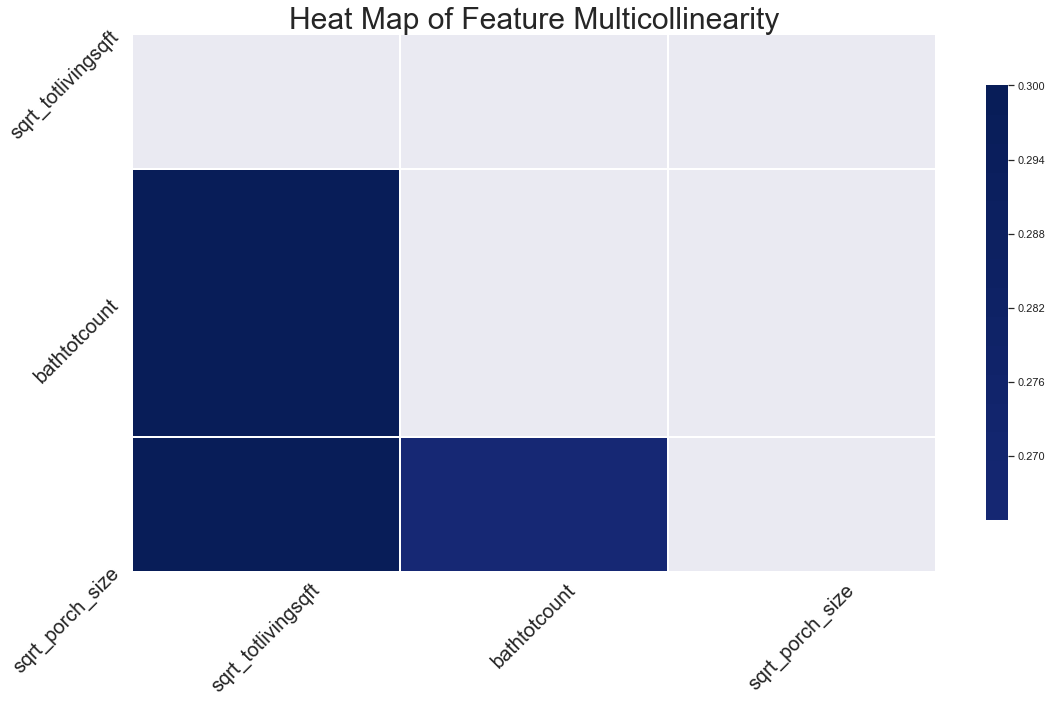

In [74]:
# features to model in model 2
features2 = ['saleprice', 'sqrt_totlivingsqft', 'bathtotcount', 'sqrt_porch_size']
# create x-features:
x_feats2 = features2.copy()
x_feats2.remove('saleprice')
mf.heatmap_multi(x_feats2, df)

Noticing the scale here, the maximium correlation value is 0.3, so while two features are highly correlated, it is only of 0.3 correlation.  Let's continue with our model:

In [75]:
model2 = mf.model(features2, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     3062.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:06:13   Log-Likelihood:            -2.5494e+05
No. Observations:               18169   AIC:                         5.099e+05
Df Residuals:                   18165   BIC:                         5.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.922e+05   1.19

So, we've increased our $R^2$ value ever so slightly from 0.332 to 0.336.  Let's check the assumptions:

### Normality:

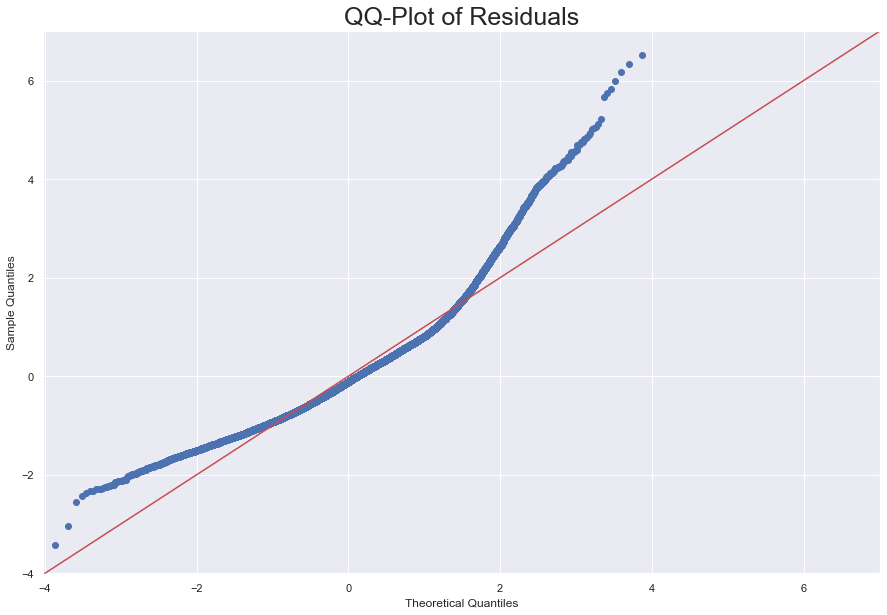

In [76]:
mf.normality_assumption(model2)

Very similar from before.  We could say that the normality assumption is **mildly** met at least for mid values...

### Homoscedasticity

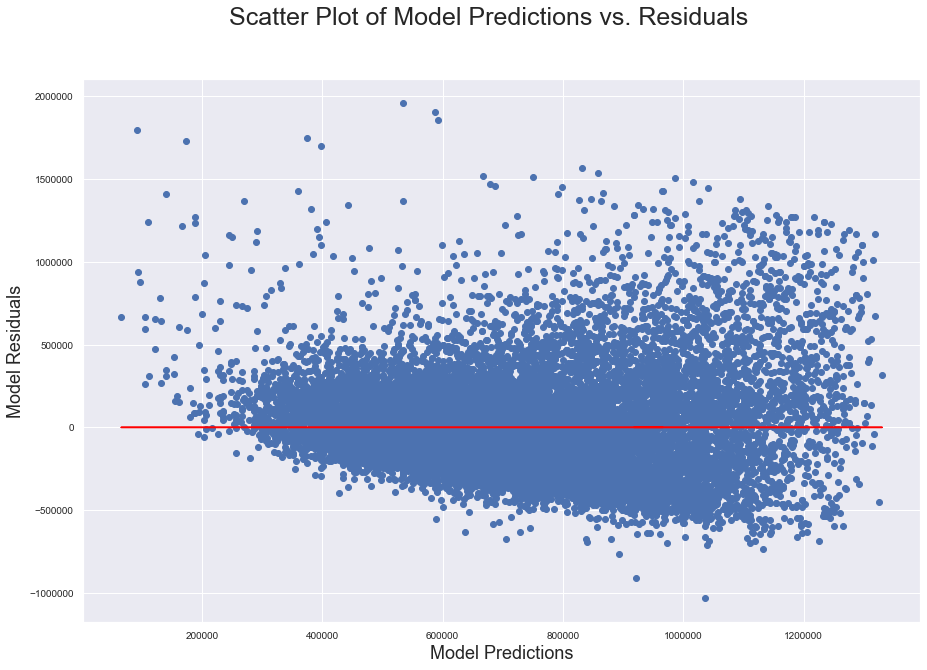

In [77]:
mf.homo_assumption(model2, df)

This has a very similar shape as our FSM however you can see the scale has changed.  We no longer have the outlier value below 0 on the x-axis.  This is most likely due to removing that outlier earlier.  We still have the cone-like shape though the residuals are still scattered about either side of zero somehwat evenly...  Again, we couldn't say the homoscedasticity assumption is met but it is not bad.

Let's continue to add features to see if we can yield better results.

# Model 3:  `saleprice ~ sqrt_totlivingsqft + bathtotcount + sqrt_porch_size + squarefeetdeck`

In this model, we investigate what adding deck square footage to our model will do.  Once again, let's visualise the deck square footage feature on it's own to check its relationship with sale price as well as its distribution.

### Relationship with Sales price:

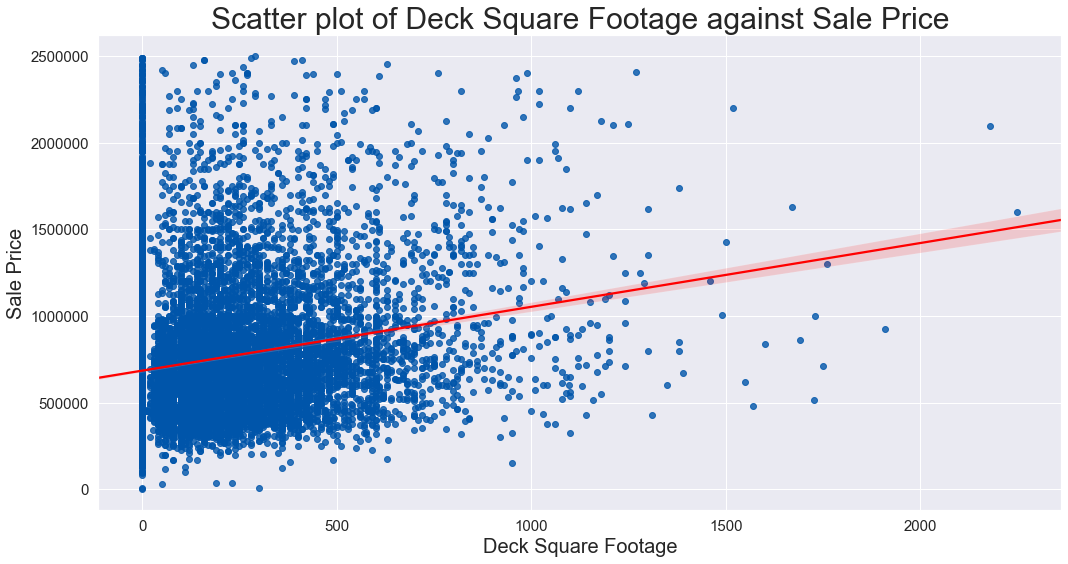

In [78]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'squarefeetdeck', y = 'saleprice', 
            data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "red"});
ax.set_title('Scatter plot of Deck Square Footage against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Deck Square Footage', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

We have similar issues has we had with porch that the 0 sqft values are throwing of the linearity.  But it is still a fairly linear relationship with Sale Price.  We don't seem to have any extreme outliers in this case either. 

### View Deck sqft Distribution

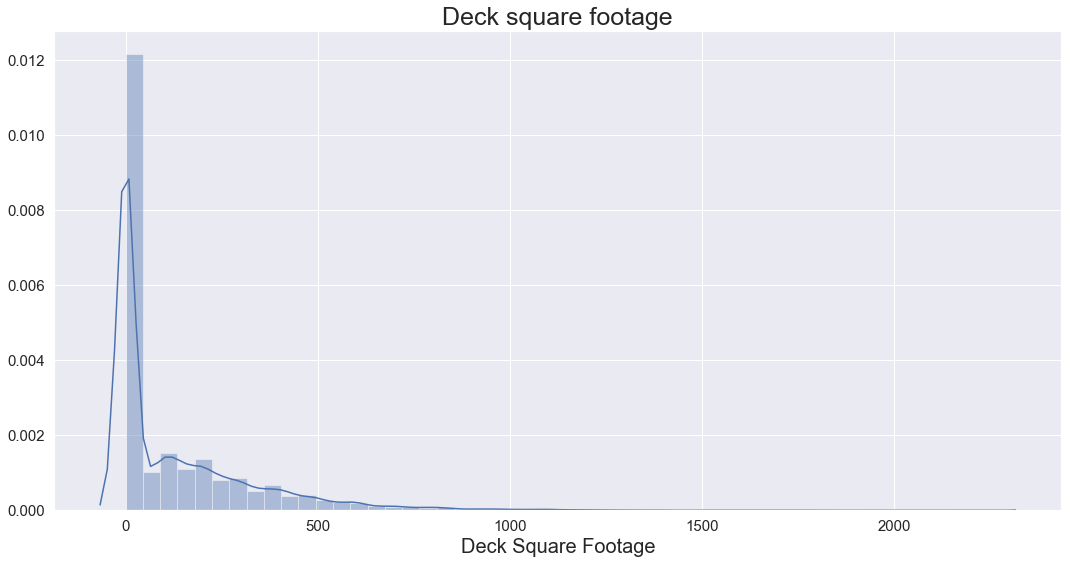

In [79]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Deck square footage', fontsize = 25)
sns.distplot(df.squarefeetdeck, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Deck Square Footage', fontsize = 20)
plt.tight_layout()

As expected, this is right skewed again.  We won't be able to use a log transformation due to the 0 data so we'll try a square root transformation again as we did with the porch:

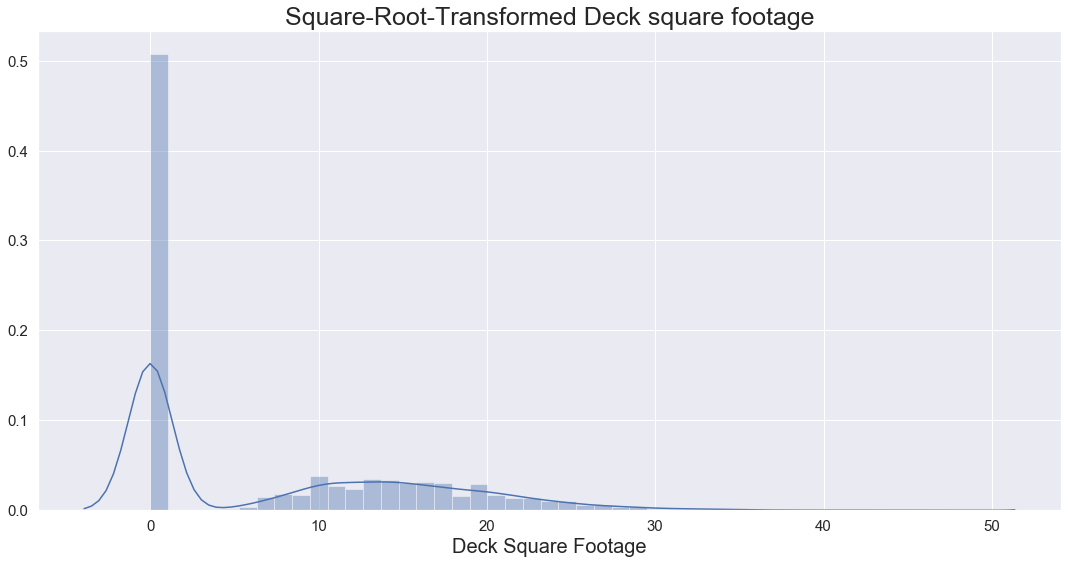

In [80]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Square-Root-Transformed Deck square footage', fontsize = 25)
sns.distplot(np.sqrt(df.squarefeetdeck), ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Deck Square Footage', fontsize = 20)
plt.tight_layout()

Once again this is being thrown off by the 0 values.  The bulk of the data though does seem to have normalised somewhat.  The scale of the plot is making it appear more flat than it is, again because of the shear volume of 0 values (representing houses without a deck).  I will create a column for this data so we can use it in our model.

In [81]:
df['sqrt_deck_size'] = np.sqrt(df.squarefeetdeck)

### Multicollinearity and Model:

Now, let's check the multicollinearity of the features and model.

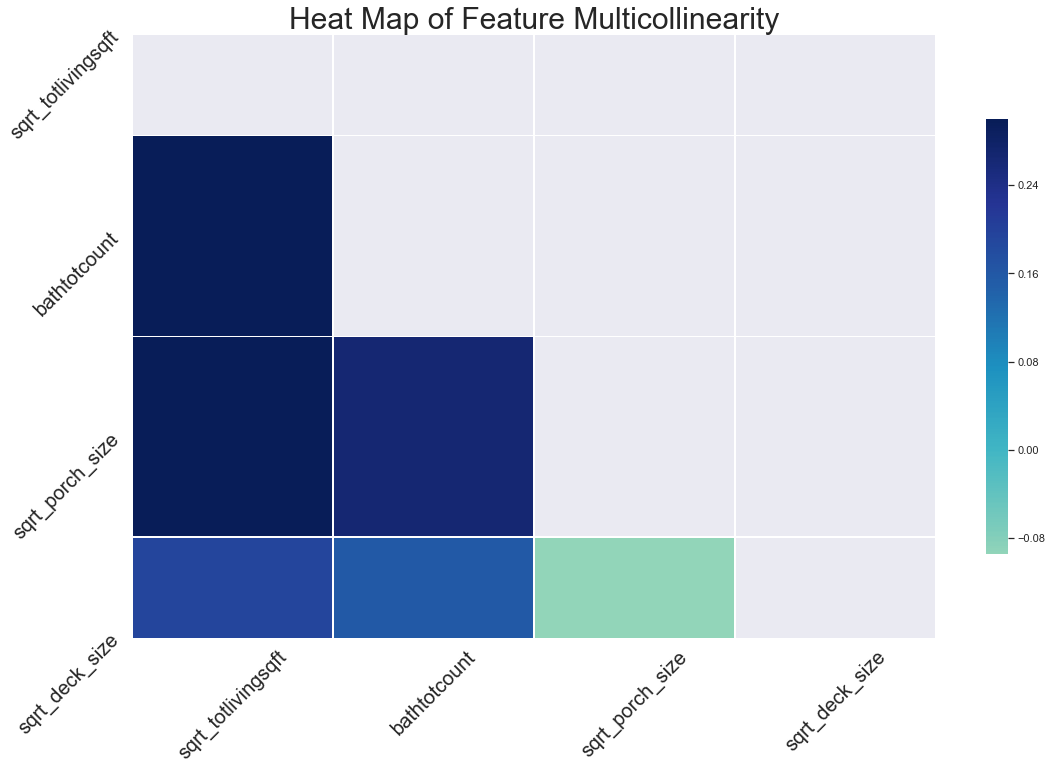

In [82]:
# features to model in model 3
features3 = ['saleprice', 'sqrt_totlivingsqft', 'bathtotcount', 'sqrt_porch_size', 'sqrt_deck_size']
# create x-features:
x_feats3 = features3.copy()
x_feats3.remove('saleprice')
mf.heatmap_multi(x_feats3, df)

From here we can see that all features have the highest correlation with total living square footage.  This makes sense since larger houses typically have more bathrooms and are more likely to have a porch and/or a deck.  Again, our max correlation between features is 0.3 so still not extremely high.  

In [83]:
model3 = mf.model(features3, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     2366.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:06:18   Log-Likelihood:            -2.5485e+05
No. Observations:               18169   AIC:                         5.097e+05
Df Residuals:                   18164   BIC:                         5.098e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.839e+05   1.18

So, we've increased our $R^2$ value ever so slightly from 0.336 to 0.343.  Once again we have low p-values for each coefficient.  Let's check the assumptions:

### Normality

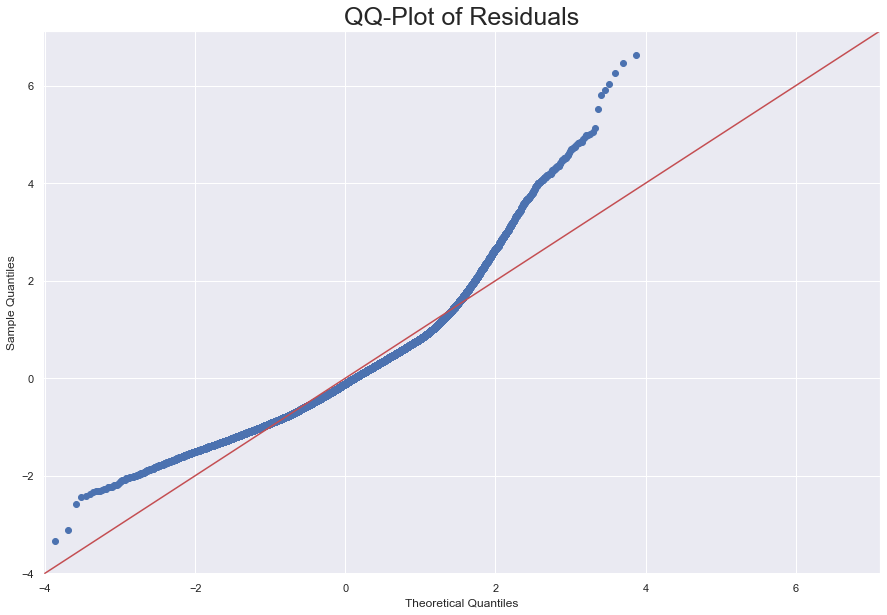

In [84]:
mf.normality_assumption(model3)

This is almost identical to model 2.

### Homoscedasticity

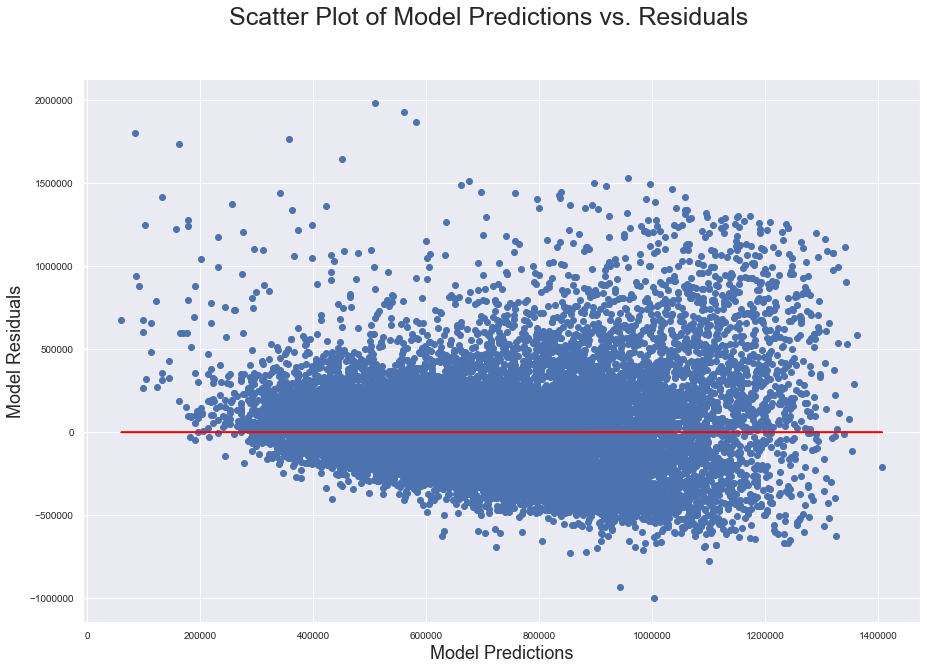

In [85]:
mf.homo_assumption(model3, df)

There appears to be no significant changes in the assumptions.  

# Model 4:  Add `buildinggrade`

Since we've now had some what of a thorough look at the features of square footage of various features and bathroom counts, let's now look at adding the highest correlated value with sale price:  building grade.  Let's start by investigating this feature:

In [86]:
# inspect unique values of building grade:
df['buildinggrade'].unique()

array([ 8,  7,  6, 10,  9, 11,  5, 12,  4,  1,  3])

In [87]:
# inspect type
df.buildinggrade.dtype

dtype('int64')

It seems like `buildingrade` is more likely to be a categorical variable.  Let's look up the look up codes to see what these values represent:

In [88]:
codes[codes['LUType'] == 82]['LUDescription']

1150    1  Cabin                                      ...
1151    10 Very Good                                  ...
1152    11 Excellent                                  ...
1153    12 Luxury                                     ...
1154    13 Mansion                                    ...
1155    2  Substandard                                ...
1156    Exceptional Properties                        ...
1157    3  Poor                                       ...
1158    4  Low                                        ...
1159    5  Fair                                       ...
1160    6  Low Average                                ...
1161    7  Average                                    ...
1162    8  Good                                       ...
1163    9  Better                                     ...
Name: LUDescription, dtype: object

Yes, this seems categorical.  After generating plots, we will dummy out these categories to be able to add them to our model.  

### Relationship with Sales price:

Let's view the relationship between building grade and sale price:

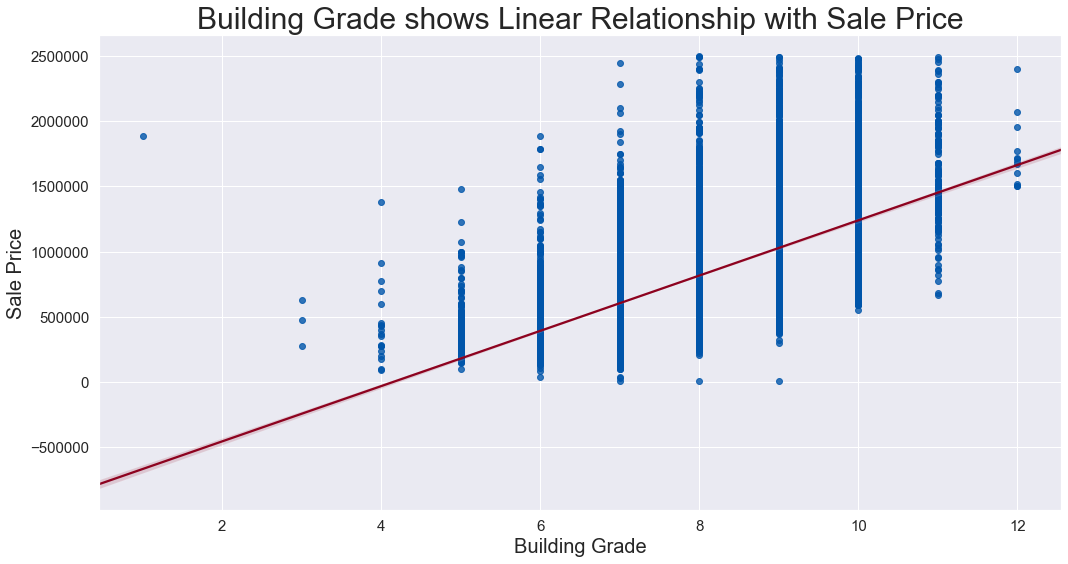

In [89]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'buildinggrade', y = 'saleprice', data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "#8D021F"});
ax.set_title('Building Grade shows Linear Relationship with Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Building Grade', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

### Visualise Average Sale Price per Building Grade

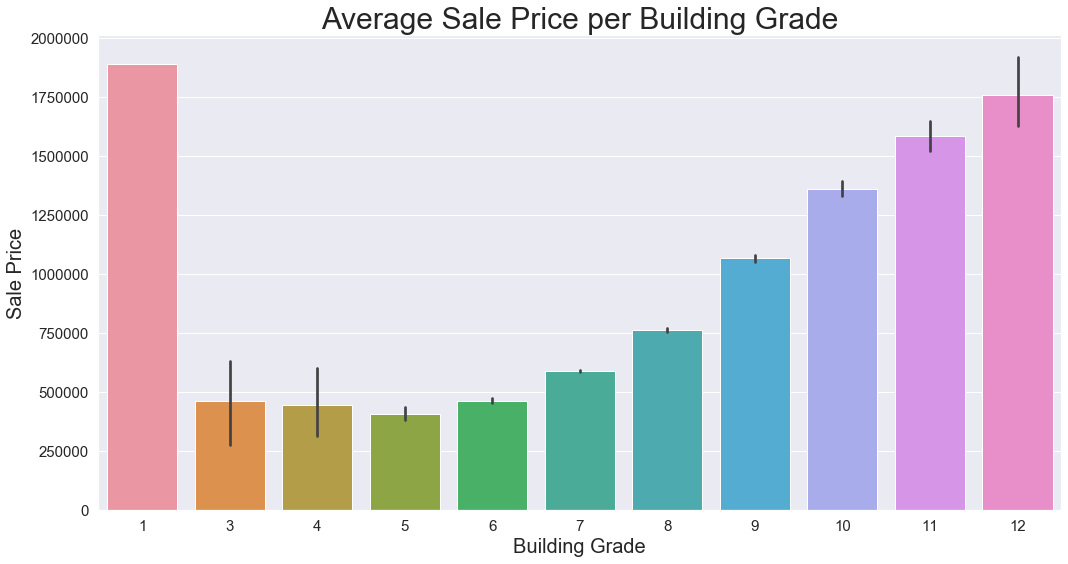

In [90]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="buildinggrade", y="saleprice", data=df)
ax.set_title('Average Sale Price per Building Grade', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Building Grade', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

This graph makes logical sense - obviously houses that are of poor build grade are going to be less than houses that are mansions.  What may be surprising is that cabins appear to have a higher average sale price than mansions do.  This is perhaps because a lot of cabins are on waterfront locations.  Also keep in mind that we have removed the substantially high-priced mansion houses from our data set.  Perhaps it would also be appropriate to remove cabins from our dataset since we are focusing on single family homes for first time home buyers and are making the assumptions that these buyers are buying their primary residence and not planning to live in a cabin.  Perhaps we could experiment with dropping cabins from our data set and running our model again without it.  

### View Building Grade Distribution

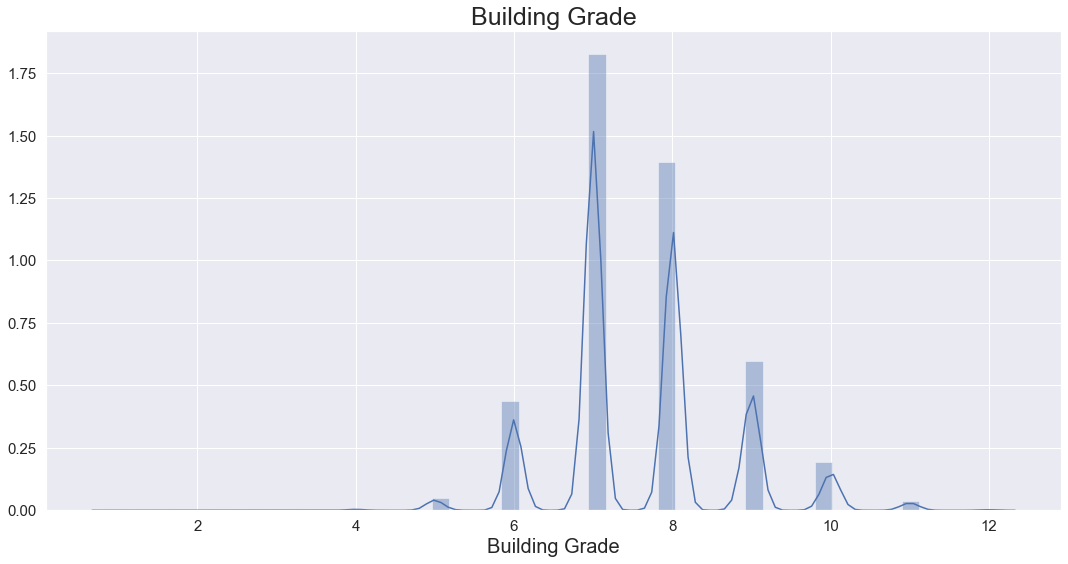

In [91]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Building Grade', fontsize = 25)
sns.distplot(df.buildinggrade, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Building Grade', fontsize = 20)
plt.tight_layout()

It looks quite normal and so we feel comfortable modeling with this as is. 

### Prepare for Modeling:

In [92]:
# change type to category
df['buildinggrade'] = df['buildinggrade'].astype('category')

In [93]:
# create dummies
buildgrade_dummies = pd.get_dummies(df['buildinggrade'], prefix='bldgr', drop_first=True)

In [94]:
df = pd.concat([df, buildgrade_dummies], axis=1)

In [95]:
# Use our same features from previous model and add building grades
build_cols = []
for column in df.columns:
    if column.startswith('bldgr'):
        build_cols.append(column)

In [96]:
features4 = features3 + build_cols

In [97]:
model4 = mf.model(features4, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     1075.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:06:22   Log-Likelihood:            -2.5318e+05
No. Observations:               18169   AIC:                         5.064e+05
Df Residuals:                   18154   BIC:                         5.065e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.704e+06   2.73

Yay!  We have somewhat significantly increased our $R^2$ value from 0.343 to 0.453.  Once again we have low p-values for each coefficient (all below $\alpha$ = 0.05).  Let's check the assumptions:

### Normality

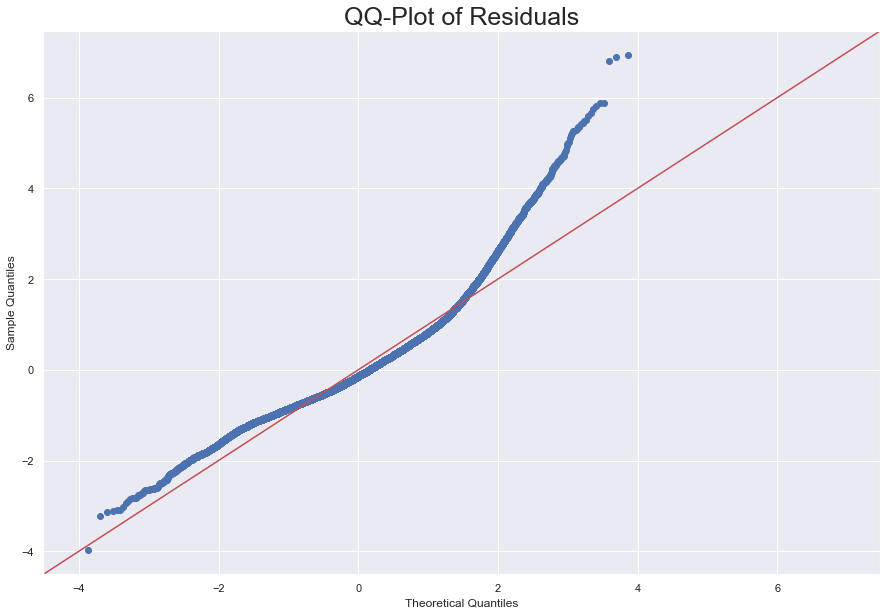

In [98]:
mf.normality_assumption(model4)

This is looking significantly better than model 3.  You can see the bottom tail of our residuals is hugging even closer to the line and infact we even have one value pulling below the line - previously all of the lower end values were drifting up and away from the line so it is good to see them trending down closer to the line.  Higher values are still trailing off and again this is to be expected due to our right skewed target variable.  At some point we might experiment with limiting our home prices more.  

### Homoscedasticity

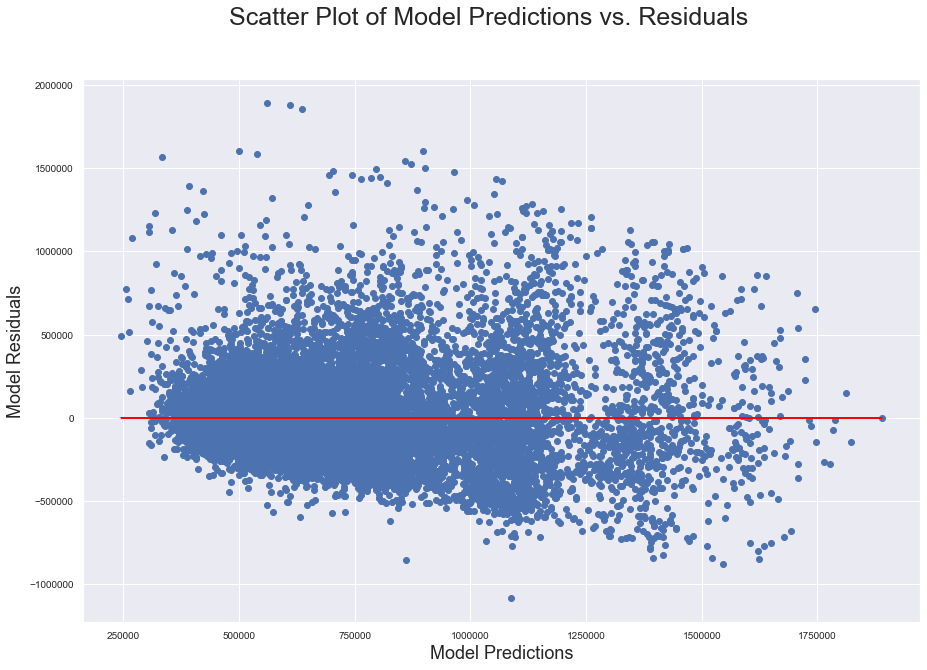

In [99]:
mf.homo_assumption(model4, df)

We do have some change in our scatter plot of the residuals and it is looking a lot less cone shaped and more sporatic towards higher values.  We still see the cluster at lower - mid range values but overall we would say that the homoscedasticity has imporved.  

So far, with the improved $R^2$ value and assumptions, this is our best model yet.  

Let's check multicollinearity before we move on:

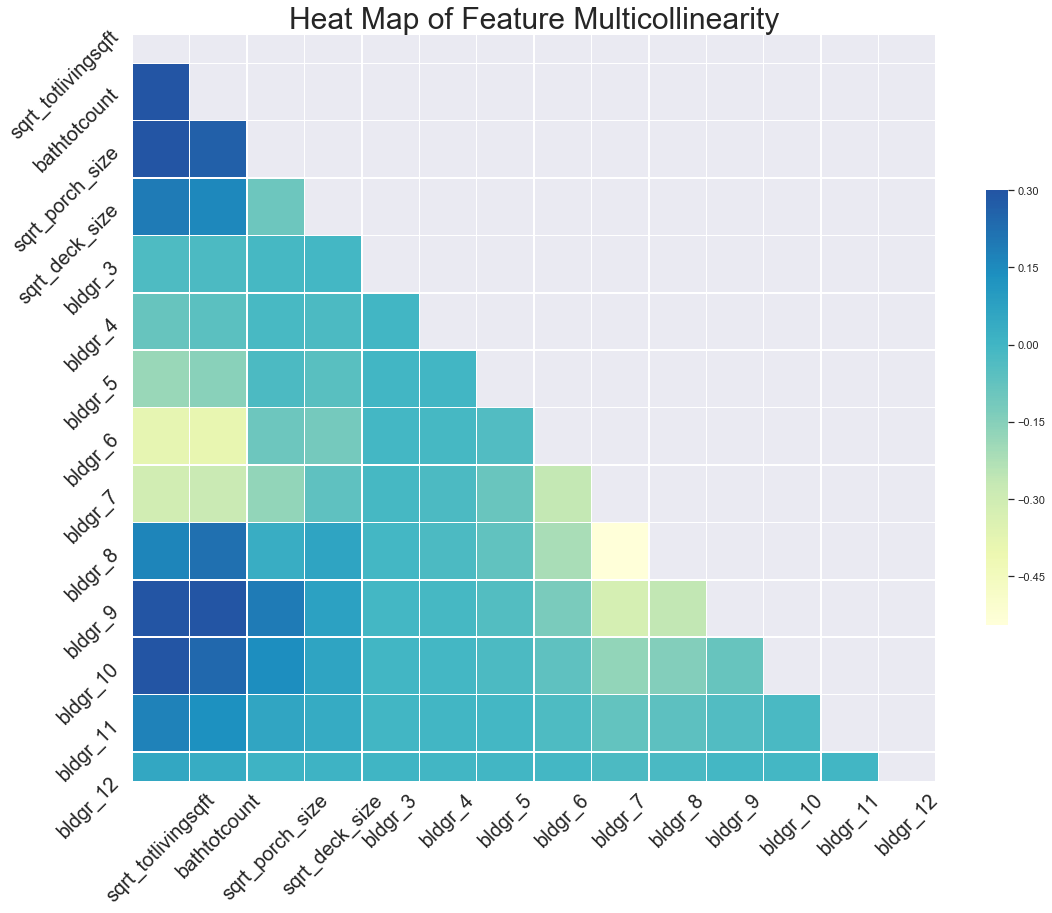

In [100]:
# create x-features:
x_feats4 = features4.copy()
x_feats4.remove('saleprice')
mf.heatmap_multi(x_feats4, df)

Once again, the max multicollinearity value is 0.3.  Again, these values happen in correlation with total living square footage which once again makes sense - building grade 9 and 10 are both better than good grade houses and so this might go hand in hand with larger square footage.

# Model 5:  Add `township`

From our correlation matrix above, we saw that `township` had a correlation varlue of 0.460482 with `saleprice`.  This makes intuitive sense since house values are very much determined by location.  For this reason, we choose to add township to our model in this iteration to see if we get any improvements. 

Investigate:

In [101]:
# explore township:
df['township'].unique()

array([25., 26., 24., 22., 21., 23., 20., 19.])

In [102]:
df.township.dtype

dtype('float64')

In [103]:
# make township into int to strip the decimal place
df['township'] = df['township'].astype('int')

In [104]:
df.township.unique()

array([25, 26, 24, 22, 21, 23, 20, 19])

### Relationship with Sales price:

Let's visualise the current relationship between `saleprice` and `township` before we decide to categorise the data:

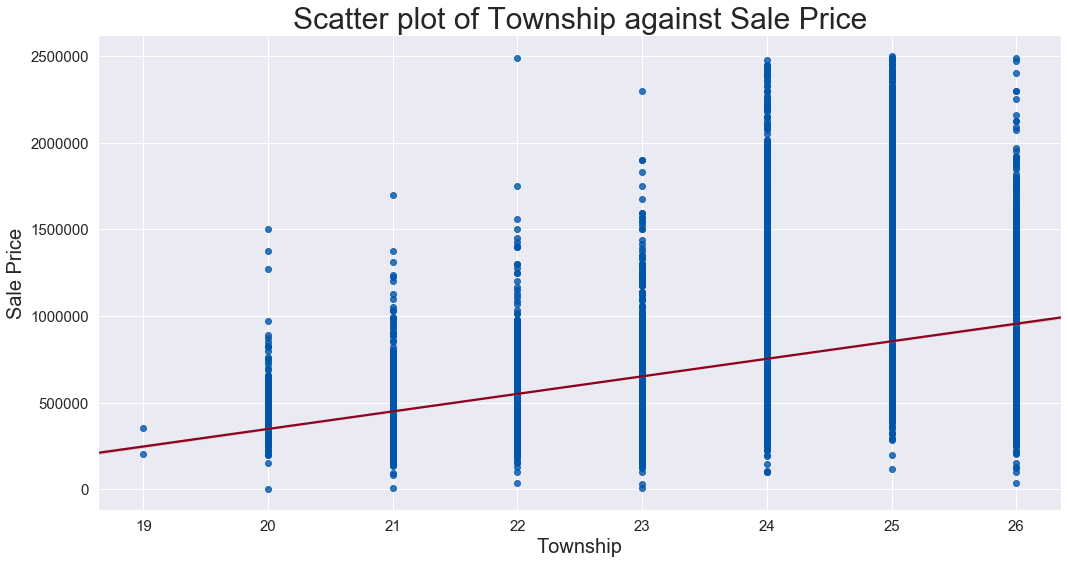

In [105]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x = 'township', y = 'saleprice', data = df, scatter_kws={"color": "#0055AA"}, line_kws={"color": "#8D021F"});
ax.set_title('Scatter plot of Township against Sale Price', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Township', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

We can see that there seems to be a fairly strong linear relationship between Township and Sale Price in King County.  We will dummy out these variables and add them to our model.

### Visualise Average Sale Price per Township

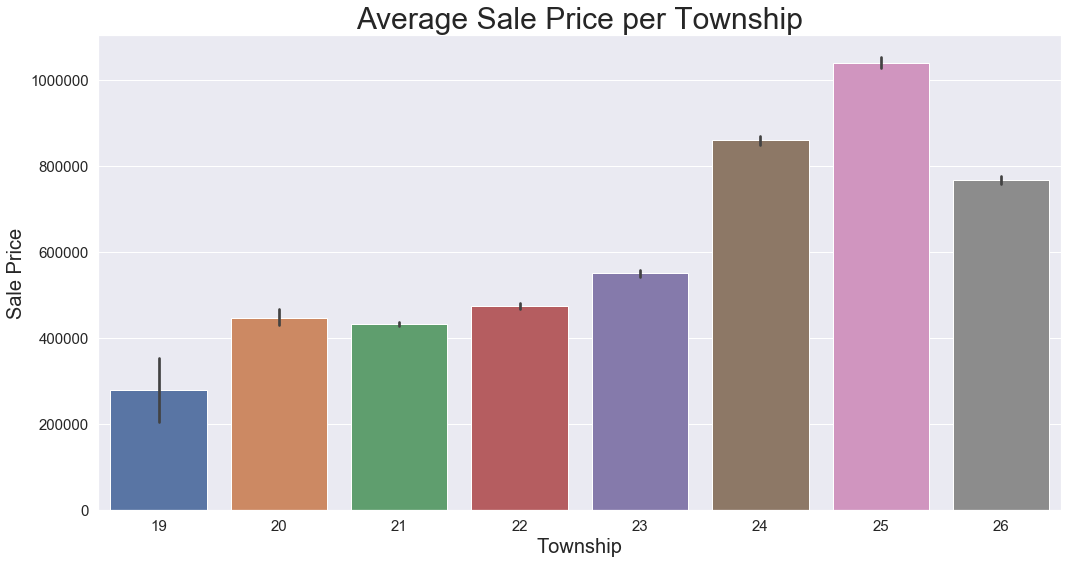

In [106]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="township", y="saleprice", data=df)
ax.set_title('Average Sale Price per Township', fontsize = 30)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Township', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

So, we can see that township 25 has the higest average sales price.  This township would be bringing up the overall average sale price of King County.  Townships 20, 21, 22 all show similar average prices.

### View Township Distribution

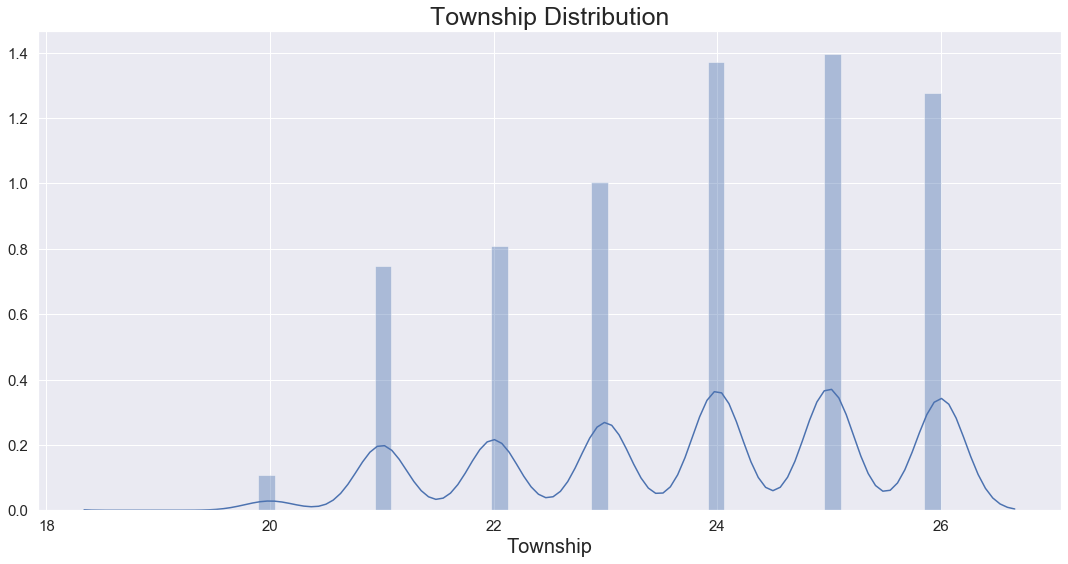

In [107]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Township Distribution', fontsize = 25)
sns.distplot(df.township, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Township', fontsize = 20)
plt.tight_layout()

Township doesn't appear to have much of a normal distribution but this is to be expected since it is a categorical variable, we saw this similar shape in the bar graph above.  

### Prepare for Modeling:

In [108]:
# change to category type
df['township'] = df['township'].astype('category')

# create dummies
township_dummies = pd.get_dummies(df['township'], prefix='twnshp', drop_first=True)

# update dataframe
df = pd.concat([df, township_dummies], axis=1)

In [109]:
# Use our same features from previous model and add townships
town_cols = []
for column in df.columns:
    if column.startswith('twnshp'):
        town_cols.append(column)

In [110]:
features5 = features4 + town_cols

In [111]:
model5 = mf.model(features5, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2036.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:06:27   Log-Likelihood:            -2.4766e+05
No. Observations:               18169   AIC:                         4.954e+05
Df Residuals:                   18147   BIC:                         4.955e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.283e+05   2.47

Wow!  Here we see our most significant increase of our $R^2$ value from 0.453 to 0.702.  This time, however, we see higher p-values for townships 20, 21, 22 and (almost) 23 (at an $\alpha$ of 0.05 once again).  Interestingly, these were the townships that were showing similar average sale prices in the bar graph above.  This now makes sense since, as we saw in the bar graph that the sale price is dominated by townships 24-26 (and arguably township 19).  So these higher p-values for these coefficients suggest that there isn't significant evidence that these townships affect sale price.  

Let's now check our assumptions:

### Normality

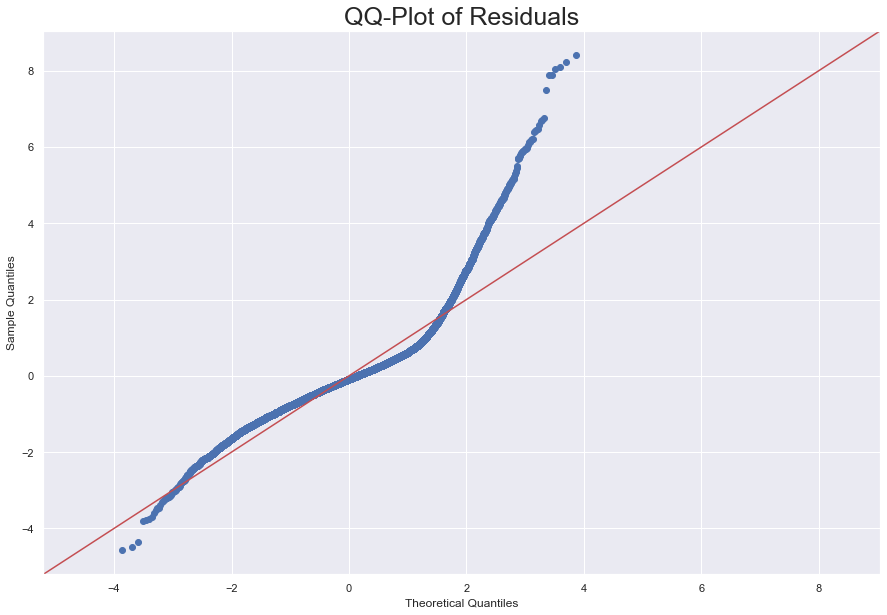

In [112]:
mf.normality_assumption(model5)

Our normality assumption has improved once again on the lower tail, now only having 3 trailing residuals at the bottom but the rest hugging the line quite tightly.  The top end of the residuals however seems to have gotten worse, leading away from the line more steeping than in model 4 - although this is harder to tell since our scales has changed here (model 4 scales was -4 - 6, where as here the scale has gone to 8).  We say that model 5 mildly meets the normality assumption.

### Homoscedasticity

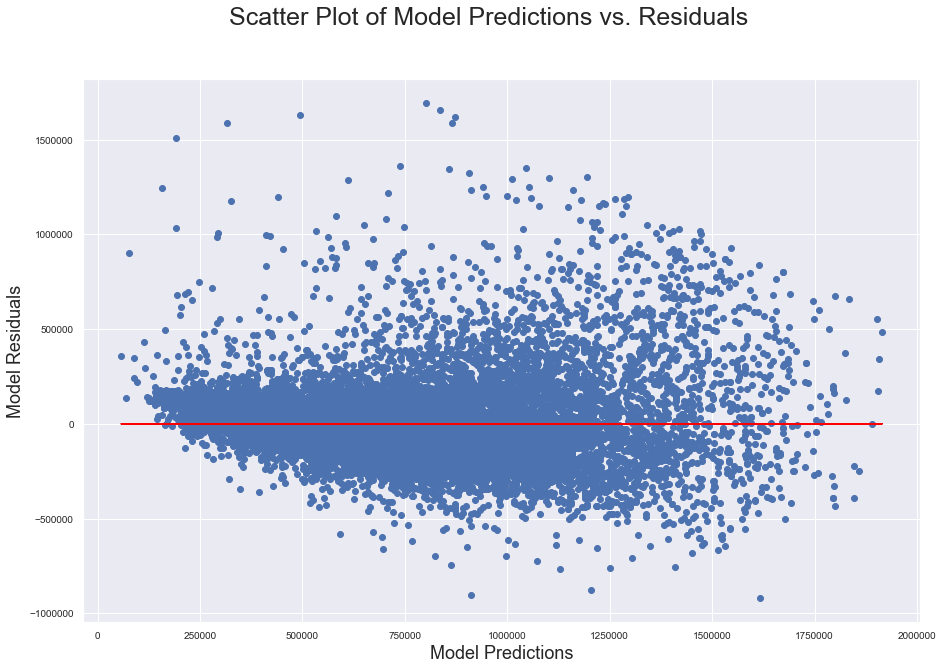

In [113]:
mf.homo_assumption(model5, df)

Our homoscedasticity assumption appears to have also gotten slightly worse.  You can see again that the scale has increased.  This could be related to the fact that we have added more features and thus more variability.  The lower x-axis values look more 'pointy' and cone like, but again, this could be still a similar shape to model 4 but looking different due to the scale.  There is definitely a noticeable difference in the overal shape however.  We do still see scattering about zero though.  Model 5 moderately meets the homoscedasticity assumption.

Check multicollinearity:

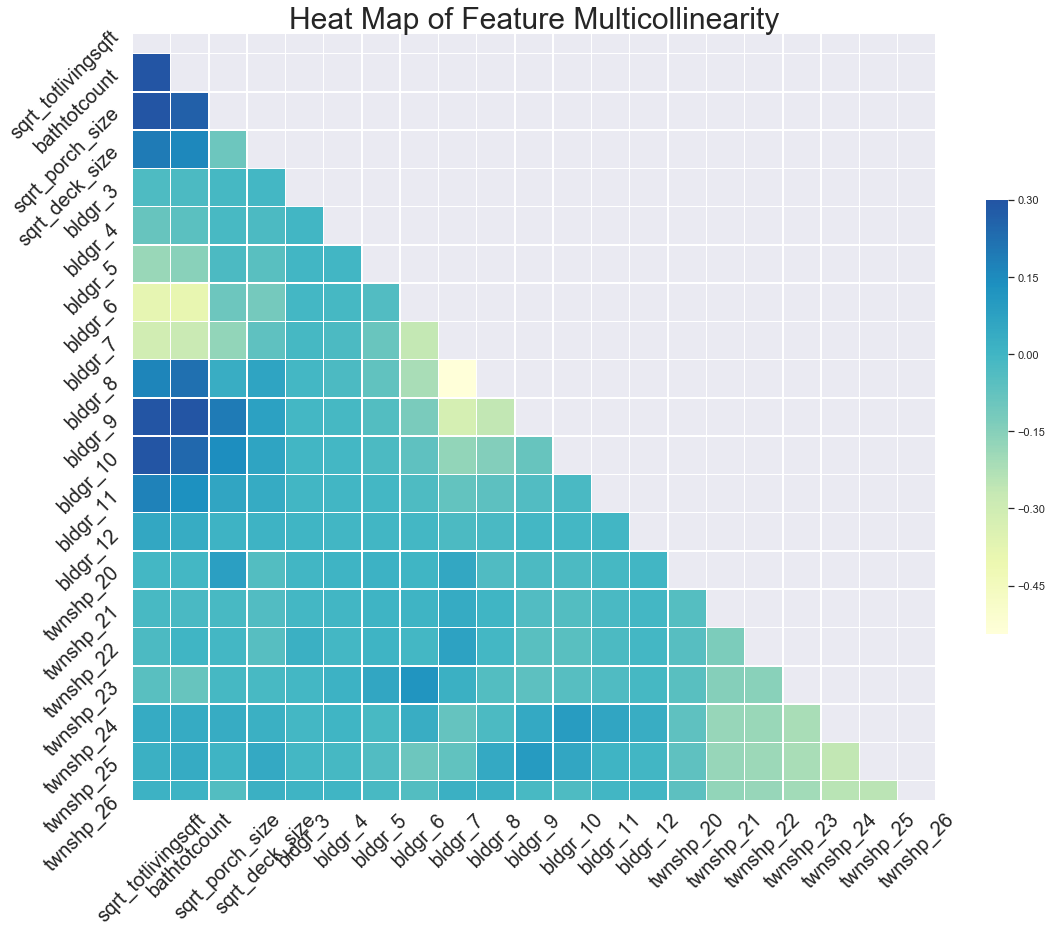

In [118]:
# create x-features:
x_feats5 = features5.copy()
x_feats5.remove('saleprice')
mf.heatmap_multi(x_feats5, df)

Township appear to have close to 0 correlation.

# Model 6:  z-scores

So far, we have increase our $R^2$ from 0.332 to 0.702 and have maintained steady improvements on the assumptions.  For this reason, we are happy with the model we have produced and will use it for our final iteration where we simply normalise our features using z-scores.  We do this mostly to view the model coefficients on a 1:1 scale.

### Turn features into z-scores:

In [114]:
# custom function which creates a column containing z-scores for feature
for feature in features5:
    mf.z_score(feature, df)

In [115]:
# add z_ infront of features to match columns just made above
features6 = list(map(lambda x: 'z_' + x, features5))

In [116]:
model6 = mf.model(features6, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2036.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:06:28   Log-Likelihood:                -14781.
No. Observations:               18169   AIC:                         2.961e+04
Df Residuals:                   18147   BIC:                         2.978e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -3.73e-17 

We can now interpret our feature coefficients more easily.

# Model interpretation

As stated previously, our model coefficients all show significant p-values expect for townships 20, 21, 22, and 23.  Since there are so many features, we explain the meaning of just 2 coefficients for example sakes.  Generally speaking, each coefficient shows how much sales price will change when a 1 unit change is made for a feature while holding all other features constant.  For example, if we increase total living square footage by 1 square foot, our model tells us we would predict the price to increase by $\$14,890$.  In the same way, if we added 1 extra bathroom while keeping all other features constant, our model predicts an increase in sale price of $\$7019.96$.

While it certainly isn't the most reliable model, it is definitely a start towards helping first time home buyers identify the factors in which drives home prices up (and down!).  

To view the in depth modeling iterations, see the [exploratory notebooks here](exploratory).

# Claim Validations

> ## Higher square footage increases home sale price

Throughout our modeling and analysis above, it has been shown that higher square footage increases home sale pricecs.

> ## Having a porch increases home sale price

First, we visualise the average home sale prices of houses with and without a porch:

In [117]:
# creater binary column of houses with/without porches
df['has_porch'] = np.where(df['sqftporch'] > 0, 'yes', 'no')

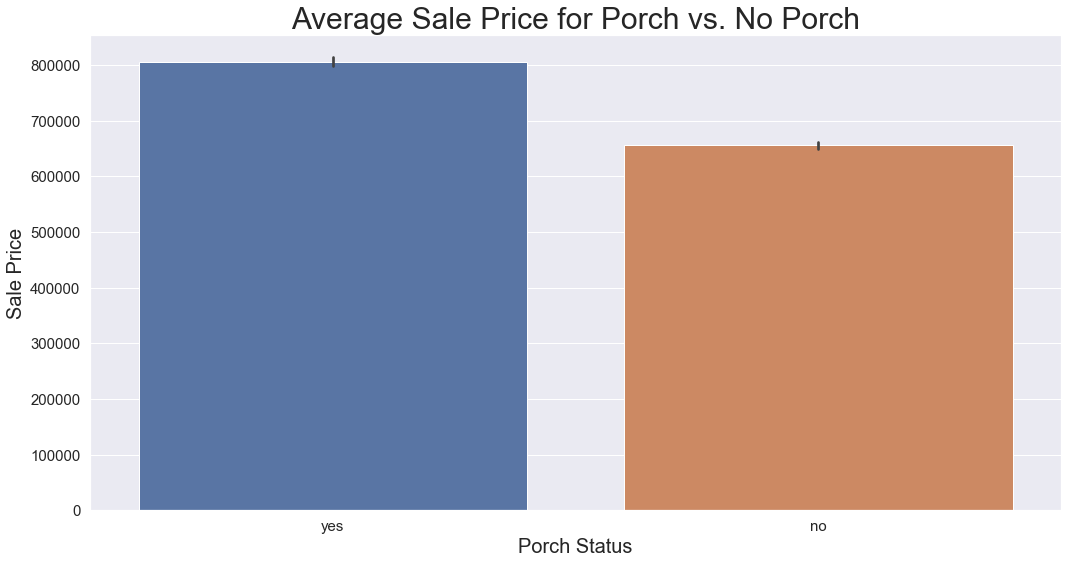

In [119]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = "has_porch", y = "saleprice", data = df)
ax.set_title('Average Sale Price for Porch vs. No Porch', fontsize = 30)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Porch Status', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout()

In [26]:
new_df.groupby(['has_porch'])['saleprice'].mean()

has_porch
no     655895.124330
yes    805994.570836
Name: saleprice, dtype: float64

So, we can see here that houses with porches do appear to have a higher average sale price.  The average sale price for a house with a porch is $\$805,994$ and with out a porch is $\$655,895$.

Let's confirm this thought with a two sample one-tailed Welch's t-test with $\alpha$ = 0.05:

> **Null hypothesis**: the mean home sale prices of homes with a porch are less than or equal to homes without a porch.

> **Alternative hypothesis**: the mean home sale prices of homes with a porch are higher than homes without a porch.

In [130]:
df_porch = df['has_porch'] == 'yes'
df_noporch = df['has_porch'] == 'no'
test_result = stats.ttest_ind(df_porch, df_noporch, equal_var=False)
print(f'test t-stat: {test_result.statistic}')
print(f'pvalue = {test_result.pvalue/2}')

test t-stat: 6.66617424507486
pvalue = 1.3315365743317931e-11


With a p-value significantly less than $\alpha$, there is significant evidence against the null hypothesis, suggesting that the mean hole sale price of homes with a porch is higher than homes without a porch.  We confirm this further with the following visualisation:

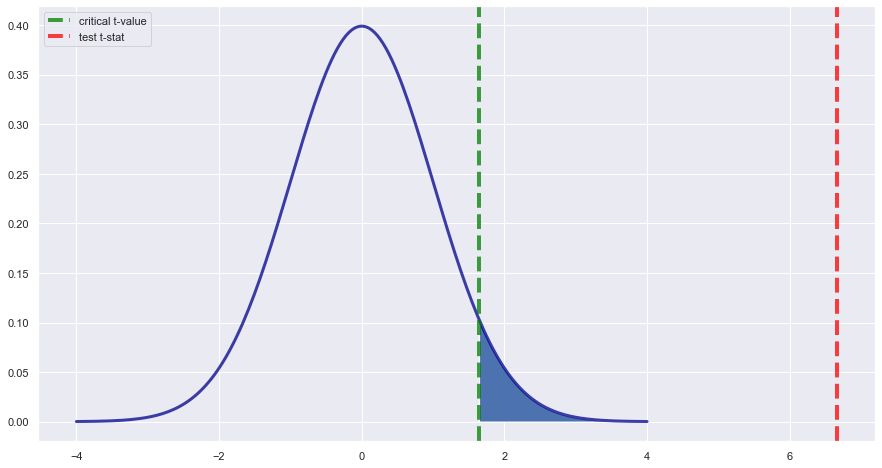

In [131]:
# custom function to plot ttest result
mf.ttest_vis(df_porch, df_noporch, test_result)

#### Effect Size:

In [126]:
# custom function for effect size
mf.Cohen_d(df_porch, df_noporch)

Effect Size for difference in Home Prices for the two groups (Cohen's d): 0.06994008354301247


0.06994008354301247

An effect size of 0.07 is quite small and shows the test has only a small effect.

> ## The presence of a nuisance (power lines, traffic noise, airport noise) decreases home sale price:

# INSERT STATISTICAL TEST HERE

# Conclusion:

This project set out to develop a model to help first-time home buyers predict home sale prices in King County based on 2019 data.  Our model found that square footage of total living area, porch and deck, bathroom count, building grade and township are some of the more significant driving factors of home sale prices with an $R^2$ value of 0.702 and the normality and homoscedacticity assumptions met fairly well.

We also found that:
- We find that a higher square footage does increase home sale prices in King County
- We find that the presence of nuisances has little affect on home sale prices in King County
- We find that having a porch does increase the home sale price in King County

Some recommendations to first time home buyers based on our analysis are:
- Think about buying smaller and adding extension later
- Consider homes without decks/porches and add later to increase value
- Bathrooms are expensive - look for homes that already have the number of baths you desire even at the expense of square footage
